<IPython.core.display.Javascript object>


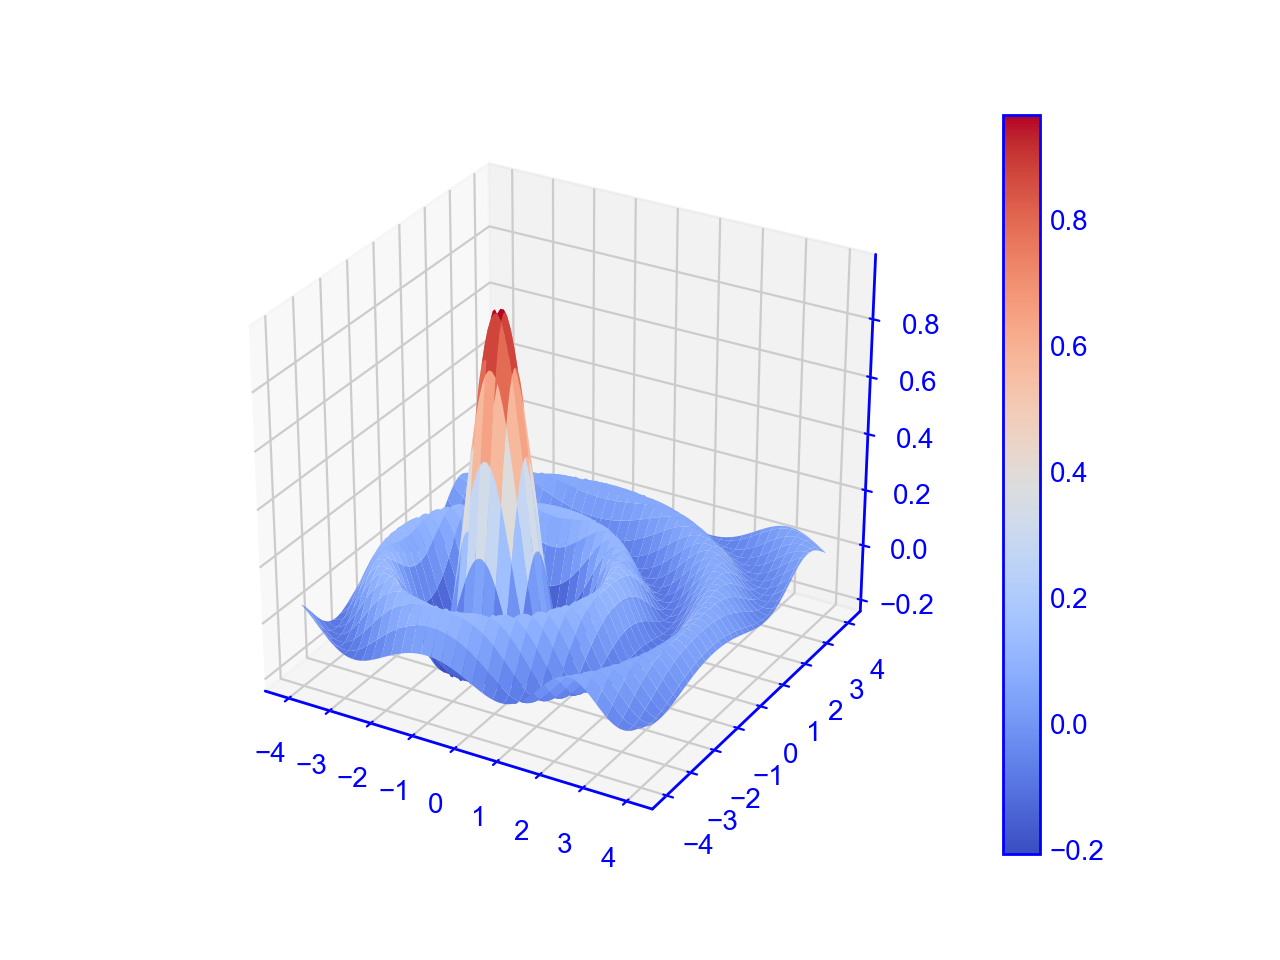

Plot shapes: [x, y, z] =  (101,) (101,) (101, 101)


In [2]:
# coding: utf-8
get_ipython().magic(u'matplotlib notebook')
# %matplotlib notebook

import sys, math
import autograd.numpy as np
#import numpy as np
import scipy
import diy

import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import pyplot as plt
from matplotlib import cm

plt.style.use(['seaborn-whitegrid'])
# plt.style.use(['ggplot'])
# plt.style.use(['classic'])
params = {"ytick.color" : "b",
          "xtick.color" : "b",
          "axes.labelcolor" : "b",
          "axes.edgecolor" : "b"}
plt.rcParams.update(params)

# --- set problem input parameters here ---
nSubDomainsX   = 2
nSubDomainsY   = 1
degree         = 4
analyticalFun  = 1
# ------------------------------------------
# Solver parameters
useAdditiveSchwartz = True
useDerivativeConstraints = 0

solverScheme   = 'TNC' # [L-BFGS-B, TNC, SLSQP, COBYLA]
nControlPointsInput = 10#(3*degree + 1) #minimum number of control points
maxIterASM     = 5
projectData    = True
useDecodedConstraints = True

maxAbsErr      = 1e-3
maxRelErr      = 1e-5
maxAdaptIter   = 3
# AdaptiveStrategy = 'extend'
AdaptiveStrategy = 'reset'
# ------------------------------------------

# Initialize DIY
w = diy.mpi.MPIComm()           # world

def plot3D(fig, Z, x=None, y=None):
    if x is None:
        x = np.arange(Z.shape[1])
    if y is None:
        y = np.arange(Z.shape[0])
    X, Y = np.meshgrid(x, y)
    print("Plot shapes: [x, y, z] = ", x.shape, y.shape, Z.shape)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    fig.colorbar(surf)
    plt.show()

from scipy.ndimage import zoom

if analyticalFun == 1:
    nPointsX = 101
    nPointsY = 101
    scale    = 1
    shiftX   = 1
    shiftY   = 1
    Dmin     = -4.
    Dmax     = 4.

    x = np.linspace(Dmin, Dmax, nPointsX)
    y = np.linspace(Dmin, Dmax, nPointsY)
    X, Y = np.meshgrid(x+shiftX, y+shiftY)
    z = scale * np.sinc(np.sqrt(X**2 + Y**2))

elif analyticalFun == 2:
    nPointsX = 101
    nPointsY = 101
    scale    = 1
    shiftX   = 0
    shiftY   = 0
    Dmin     = 0
    Dmax     = math.pi

    x = np.linspace(Dmin, Dmax, nPointsX)
    y = np.linspace(Dmin, Dmax, nPointsY)
    X, Y = np.meshgrid(x+shiftX, y+shiftY)
    z = scale * np.sin(X) * np.sin(Y)

else:
    binFactor = 4.0
    z = np.fromfile("s3d_2D.raw", dtype=np.float64).reshape(540,704)
    z = z.T
    #z = np.fromfile("nek5000.raw", dtype=np.float64).reshape(200,200)
    z = zoom(z, 1./binFactor, order=4)
    print ("S3D shape:", z.shape)
    nPointsX = z.shape[1]
    nPointsY = z.shape[0]
    Dmin     = 0.
    Dmax     = 100.
    x = np.linspace(Dmin, Dmax, nPointsX)
    y = np.linspace(Dmin, Dmax, nPointsY)


# if nPointsX % nSubDomainsX > 0 or nPointsY % nSubDomainsY > 0:
#     print ( "[ERROR]: The total number of points do not divide equally with subdomains" )
#     sys.exit(1)

fig = plt.figure()
zRange = z.max()-z.min()
plot3D(fig, z, x, y)



Subdomain 0:  0 0 50 100
Subdomain 1:  50 0 100 100
Rank: 0, Subdomain 1: Bounds = [50 - 100, 0 - 100]
Rank: 0, Subdomain 0: Bounds = [0 - 50, 0 - 100]

---- Starting Iteration: 0 ----
1 sending to 0: [20. 25.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] to direction (-1 0)
0 sending to 1: [10. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.] to direction (1 0)
1 received from 0: [10. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.] from direction (-1 0), with sizes 10+15
Right received: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 received from 1: [20. 25.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0

<IPython.core.display.Javascript object>


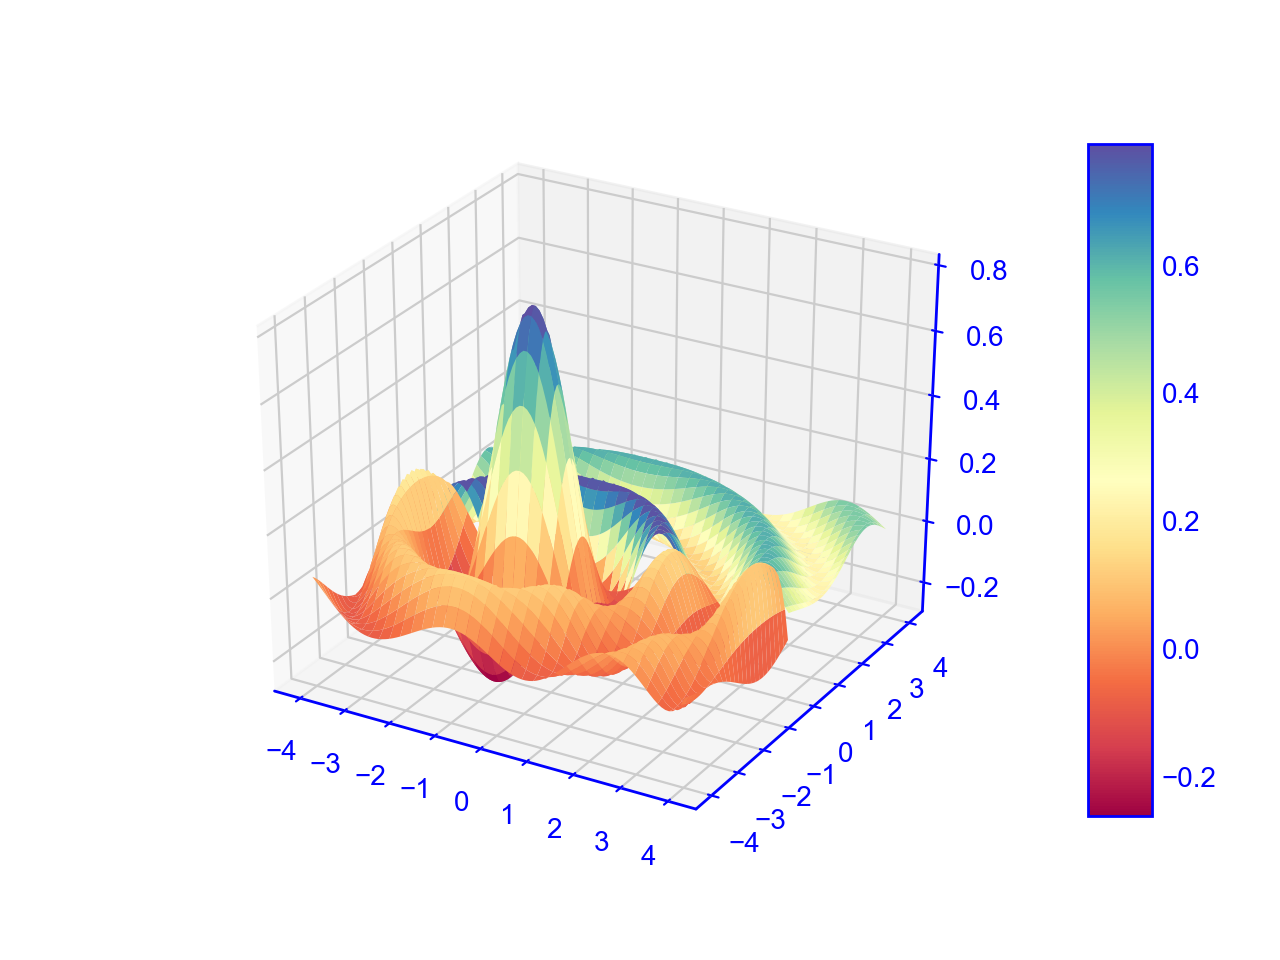

<IPython.core.display.Javascript object>


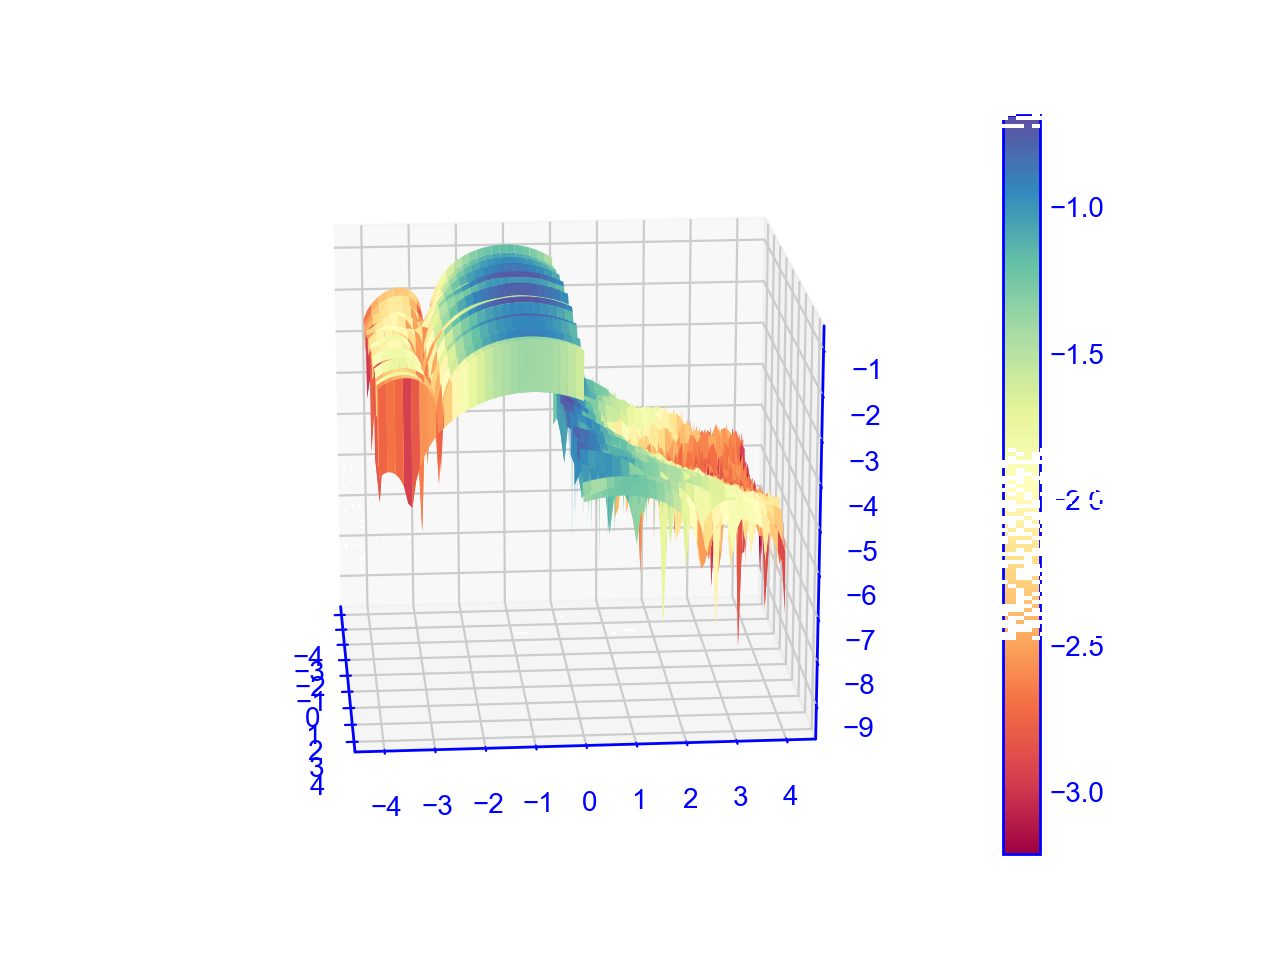


---- Starting Iteration: 1 ----
1 sending to 0: [ 2.00000000e+01  2.50000000e+01 -2.76495391e-02 -3.74503876e-02
 -5.38818908e-02 -6.32526563e-02 -5.02541183e-02 -2.80183222e-02
 -9.18017651e-03  8.34992986e-04  8.34422687e-04 -9.17945884e-03
 -2.80193821e-02 -5.02523815e-02 -6.32558544e-02 -5.07507862e-02
 -7.74286077e-03  4.32720442e-02  5.91772633e-02  2.88673470e-02
  2.07430344e-03 -9.96729719e-03 -4.00000000e+00 -4.00000000e+00
 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -3.50000000e+00
 -3.00000000e+00 -2.50000000e+00 -2.00000000e+00 -1.50000000e+00
 -1.00000000e+00 -5.00000000e-01  0.00000000e+00  5.00000000e-01
  1.00000000e+00  1.50000000e+00  2.00000000e+00  2.50000000e+00
  3.00000000e+00  3.50000000e+00  4.00000000e+00  4.00000000e+00
  4.00000000e+00  4.00000000e+00  4.00000000e+00] to direction (-1 0)
0 sending to 1: [ 1.00000000e+01  1.50000000e+01  5.47300397e-02  5.41616339e-03
 -1.39525442e-01 -7.03061074e-02  9.92897619e-02 -2.32906311e-01
  1.39433716e-01  5.

Residual =  1.9045703618463765  and res_dec =  3.7612191518328375  and constraint =  3.7985319948970824e-05
Iteration:  9
Residual =  1.9045696072371991  and res_dec =  3.7612184481644713  and constraint =  3.798530486561136e-05
[2] : Converged (|f_n-f_(n-1)| ~= 0)
	Decoded error:  0.3806966807665596
NURBSInterp Right proj:  (10,) (25,) (25,) (15,)
Original interpolation shapes:  10 [-4.         -4.         -4.         -4.         -4.         -2.66666667
 -1.33333333  0.          1.33333333  2.66666667  4.          4.
  4.          4.          4.        ] [-4.  -4.  -4.  -4.  -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.   4.   4.   4. ]
New interpolation shapes:  10 15  before inserting  -3.5  at  5
New interpolation shapes:  11 16  before inserting  -3.0  at  6
New interpolation shapes:  12 17  before inserting  -2.5  at  8
New interpolation shapes:  13 18  before inserting  -2.0  at  9
New interpolation shapes:  14 19  before inserting  -1

Residual =  30.144028160348068  and res_dec =  10.994396576383688  and constraint =  0.0006016266050884795
Iteration:  6
Residual =  30.144026453728323  and res_dec =  10.994396576383636  and constraint =  0.0006016265709558793
[1] : Converged (|f_n-f_(n-1)| ~= 0)
	Decoded error:  4.499858017922279
NURBSInterp Left proj:  (20,) (15,) (15,) (25,)
Original interpolation shapes:  20 [-4.  -4.  -4.  -4.  -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.   4.   4.   4. ] [-4.         -4.         -4.         -4.         -4.         -2.66666667
 -1.33333333  0.          1.33333333  2.66666667  4.          4.
  4.          4.          4.        ]
New interpolation shapes:  20 25  before inserting  -2.666666666666667  at  7
New interpolation shapes:  21 26  before inserting  -1.3333333333333335  at  11
New interpolation shapes:  22 27  before inserting  1.333333333333333  at  17
New interpolation shapes:  23 28  before inserting  2.666666666666667  at  21

<IPython.core.display.Javascript object>


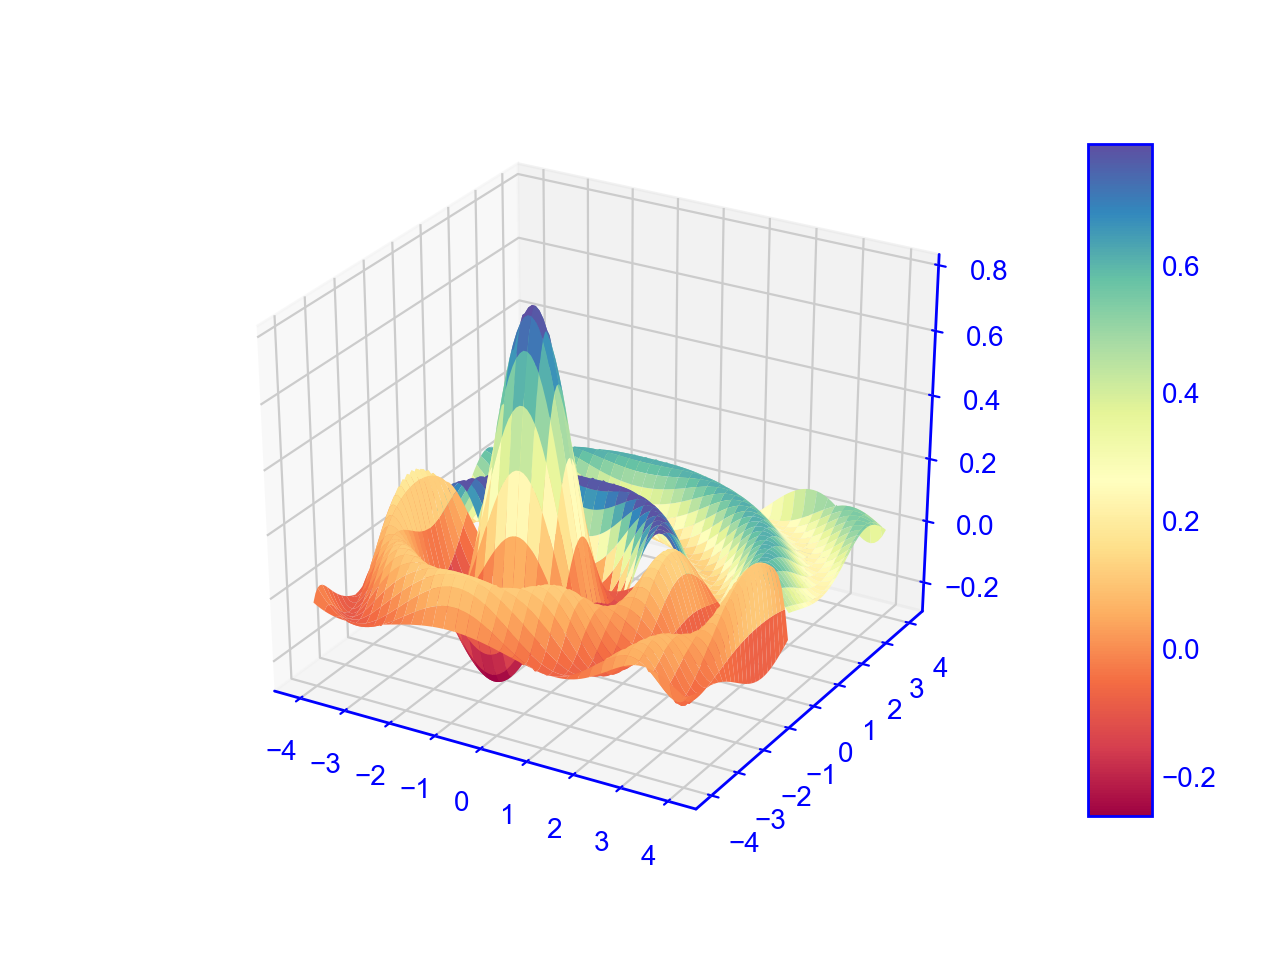

<IPython.core.display.Javascript object>


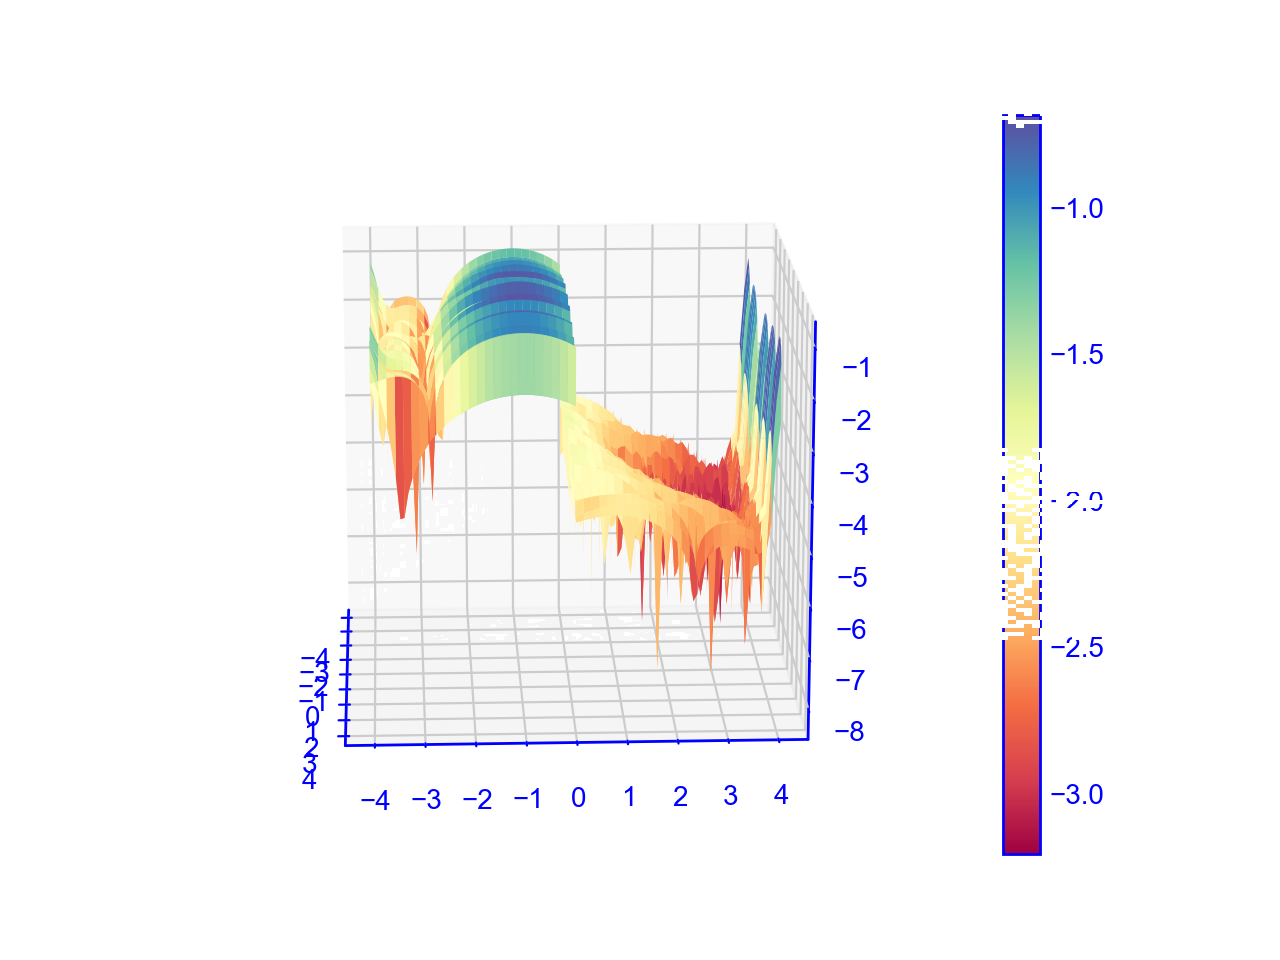


---- Starting Iteration: 2 ----
1 sending to 0: [ 2.00000000e+01  2.50000000e+01  5.47399065e-02  3.61683954e-02
 -7.10921204e-03 -6.98546780e-02 -1.00260443e-01 -7.76084234e-02
 -3.27889136e-02  8.64732342e-03  1.27473557e-02 -2.98104370e-02
 -8.92616279e-02 -1.03421334e-01 -5.39585419e-02  2.42944944e-02
  6.88627294e-02  5.61263769e-02 -2.84000889e-02 -8.87819440e-02
 -5.82158991e-02 -1.25354323e-02 -4.00000000e+00 -4.00000000e+00
 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -3.50000000e+00
 -3.00000000e+00 -2.50000000e+00 -2.00000000e+00 -1.50000000e+00
 -1.00000000e+00 -5.00000000e-01  0.00000000e+00  5.00000000e-01
  1.00000000e+00  1.50000000e+00  2.00000000e+00  2.50000000e+00
  3.00000000e+00  3.50000000e+00  4.00000000e+00  4.00000000e+00
  4.00000000e+00  4.00000000e+00  4.00000000e+00] to direction (-1 0)
0 sending to 1: [ 1.00000000e+01  1.50000000e+01 -2.67426837e-02 -5.78707779e-02
 -7.04184027e-02 -8.41637314e-03  1.79105439e-02 -5.27569903e-02
 -8.91517144e-02  1.

NURBSInterp Right proj:  (10,) (25,) (15,) (101,)
2  - Applying the constrained solver.
Left  [0.]
Right  [-2.67426837e-02 -3.36863795e-02 -3.96149660e-02 -4.45863829e-02
 -4.86578541e-02 -5.18858880e-02 -5.43262774e-02 -5.60340992e-02
 -5.70637151e-02 -5.74687706e-02 -5.73021960e-02 -5.66162058e-02
 -5.54622988e-02 -5.38912582e-02 -5.19531516e-02 -4.96973309e-02
 -4.71724324e-02 -4.44263758e-02 -4.15061603e-02 -3.84569431e-02
 -3.53215966e-02 -3.21406946e-02 -2.89525126e-02 -2.57930280e-02
 -2.26959198e-02 -1.96925686e-02 -1.68120569e-02 -1.40811689e-02
 -1.15243903e-02 -9.16390863e-03 -7.01961321e-03 -5.10909498e-03
 -3.44764658e-03 -2.04826240e-03 -9.21639069e-04 -7.61952237e-05
  4.81887689e-04  7.48656333e-04  7.22385442e-04  4.03577825e-04
 -2.05035635e-04 -1.09849598e-03 -2.26961619e-03 -3.70898115e-03
 -5.40494769e-03 -7.34364455e-03 -9.50897242e-03 -1.18826039e-02
 -1.44439835e-02 -1.71703277e-02 -2.00366249e-02 -2.30156515e-02
 -2.60781504e-02 -2.91930087e-02 -3.23272741e-02 

Iteration:  13
Residual =  1.9616244482463108  and res_dec =  10.994396576294989  and constraint =  3.798500218143366e-05
Iteration:  14
Residual =  1.9616239956401431  and res_dec =  10.99439656956317  and constraint =  3.79849931300354e-05
[1] : Converged (|f_n-f_(n-1)| ~= 0)
	Decoded error:  4.47663547771865
NURBSInterp Left proj:  (20,) (15,) (15,) (25,)
Original interpolation shapes:  20 [-4.  -4.  -4.  -4.  -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.   4.   4.   4. ] [-4.         -4.         -4.         -4.         -4.         -2.66666667
 -1.33333333  0.          1.33333333  2.66666667  4.          4.
  4.          4.          4.        ]
New interpolation shapes:  20 25  before inserting  -2.666666666666667  at  7
New interpolation shapes:  21 26  before inserting  -1.3333333333333335  at  11
New interpolation shapes:  22 27  before inserting  1.333333333333333  at  17
New interpolation shapes:  23 28  before inserting  2.6666666666

<IPython.core.display.Javascript object>


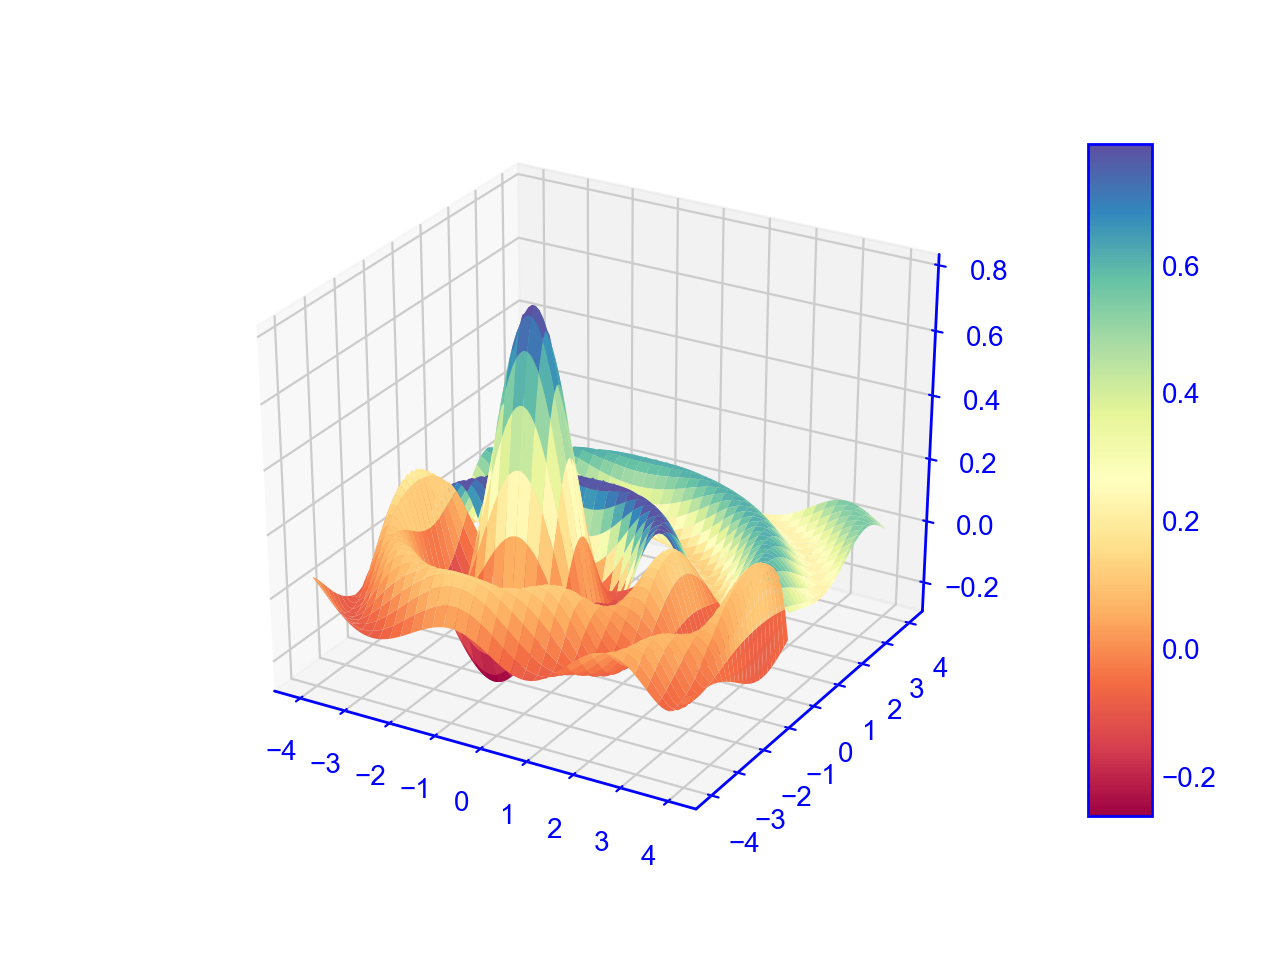

<IPython.core.display.Javascript object>


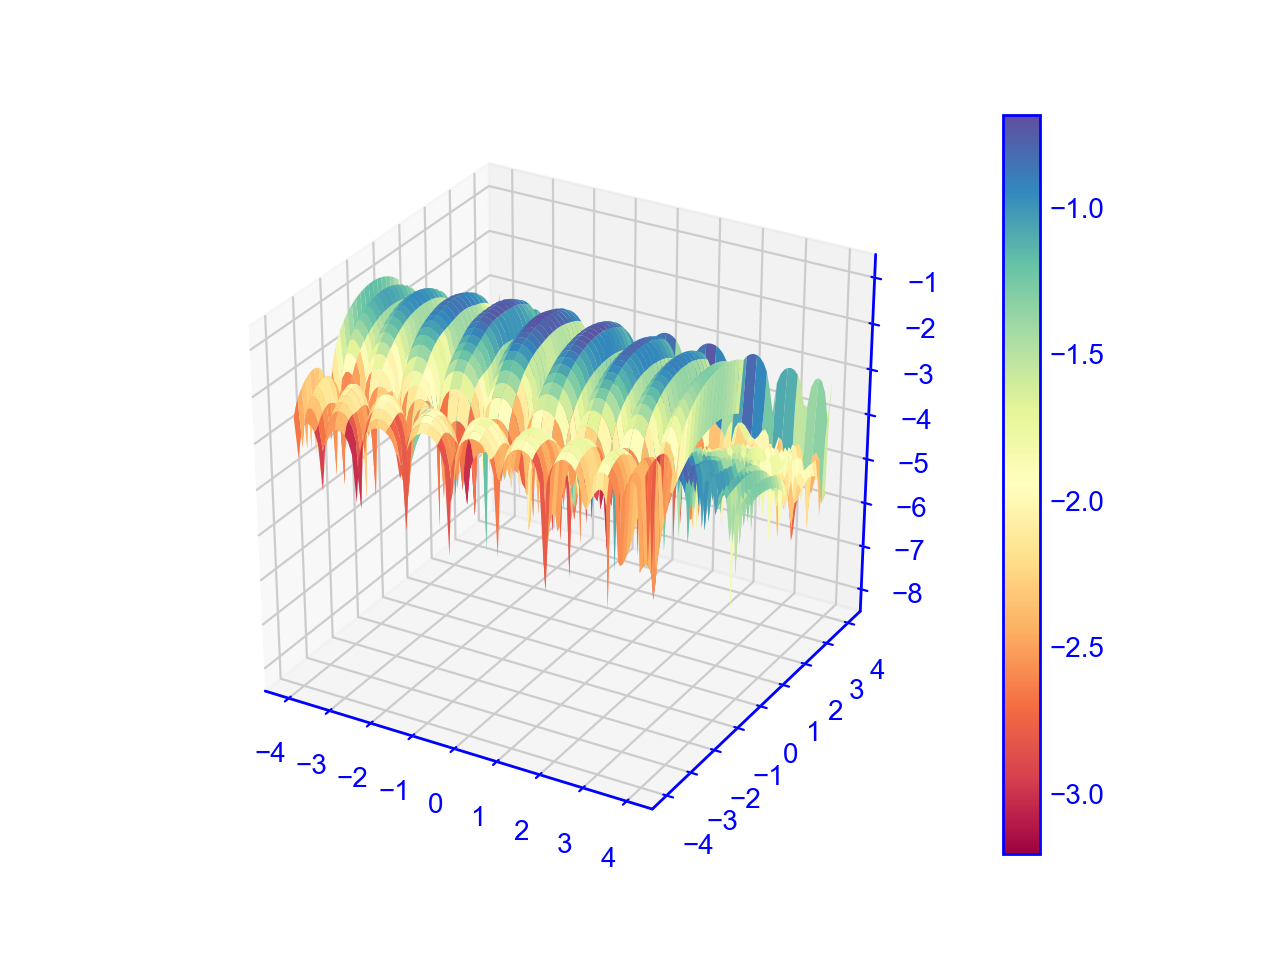


---- Starting Iteration: 3 ----
1 sending to 0: [ 2.00000000e+01  2.50000000e+01 -2.67422193e-02 -3.84189869e-02
 -5.47642501e-02 -6.19485528e-02 -5.00485336e-02 -2.90472546e-02
 -9.53740487e-03  1.84980299e-03  1.58907988e-03 -9.87235631e-03
 -2.95119408e-02 -4.95923567e-02 -6.17805480e-02 -5.08614541e-02
 -9.67338788e-03  4.41607474e-02  6.04483738e-02  2.74759113e-02
  1.56472980e-03 -9.15350994e-03 -4.00000000e+00 -4.00000000e+00
 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -3.50000000e+00
 -3.00000000e+00 -2.50000000e+00 -2.00000000e+00 -1.50000000e+00
 -1.00000000e+00 -5.00000000e-01  0.00000000e+00  5.00000000e-01
  1.00000000e+00  1.50000000e+00  2.00000000e+00  2.50000000e+00
  3.00000000e+00  3.50000000e+00  4.00000000e+00  4.00000000e+00
  4.00000000e+00  4.00000000e+00  4.00000000e+00] to direction (-1 0)
0 sending to 1: [ 1.00000000e+01  1.50000000e+01  5.47303378e-02  5.41548379e-03
 -1.39524648e-01 -7.03068172e-02  9.92903472e-02 -2.32907021e-01
  1.39434876e-01  5.

NURBSInterp Right proj:  (10,) (25,) (15,) (101,)
2  - Applying the constrained solver.
Left  [0.]
Right  [ 0.05473034  0.04245471  0.02952985  0.0162807   0.00300371 -0.01003312
 -0.02259033 -0.03445691 -0.04545035 -0.05541664 -0.06423024 -0.07179411
 -0.0780397  -0.08292695 -0.08644427 -0.08860857 -0.08946526 -0.08908822
 -0.08757624 -0.08503713 -0.08157999 -0.077315   -0.07235341 -0.06680756
 -0.06079086 -0.05441779 -0.04780393 -0.04106592 -0.03432147 -0.0276894
 -0.02128957 -0.01524295 -0.00967156 -0.00469851 -0.0004478   0.0029625
  0.00543432  0.00689269  0.00728582  0.00658502  0.00478476  0.00190265
 -0.00202056 -0.00692099 -0.01271162 -0.01928228 -0.02649967 -0.03420736
 -0.04222575 -0.05035213 -0.05836064 -0.06600454 -0.07304099 -0.07925591
 -0.08446617 -0.08851962 -0.09129509 -0.09270239 -0.09268231 -0.09120662
 -0.08827806 -0.08393036 -0.0782282  -0.07126726 -0.06317421 -0.05410668
 -0.04425327 -0.03383354 -0.02309195 -0.01227041 -0.00159514  0.00872373
  0.01849217  0.0275

Iteration:  27
Residual =  1.8216514074836176  and res_dec =  10.994158494016288  and constraint =  3.517988732660464e-05
Iteration:  28
Residual =  1.8216439074581687  and res_dec =  10.995028157601762  and constraint =  3.517987880873253e-05
Iteration:  29
Residual =  1.8216394055887786  and res_dec =  10.995069456932047  and constraint =  3.517987569388903e-05
Iteration:  30
Residual =  1.8216367586603037  and res_dec =  10.9949168310164  and constraint =  3.517987344800679e-05
Iteration:  31
Residual =  1.8216337393630242  and res_dec =  10.993097664611575  and constraint =  3.517987372929099e-05
Iteration:  32
Residual =  1.8216318696286626  and res_dec =  10.99227368379491  and constraint =  3.517987344853566e-05
Iteration:  33
Residual =  1.8216307318422458  and res_dec =  10.99268804501804  and constraint =  3.517987472769747e-05
Iteration:  34
Residual =  1.8216298260206107  and res_dec =  10.994194760483877  and constraint =  3.517987243434956e-05
[1] : Converged (|f_n-f_(n-1

<IPython.core.display.Javascript object>


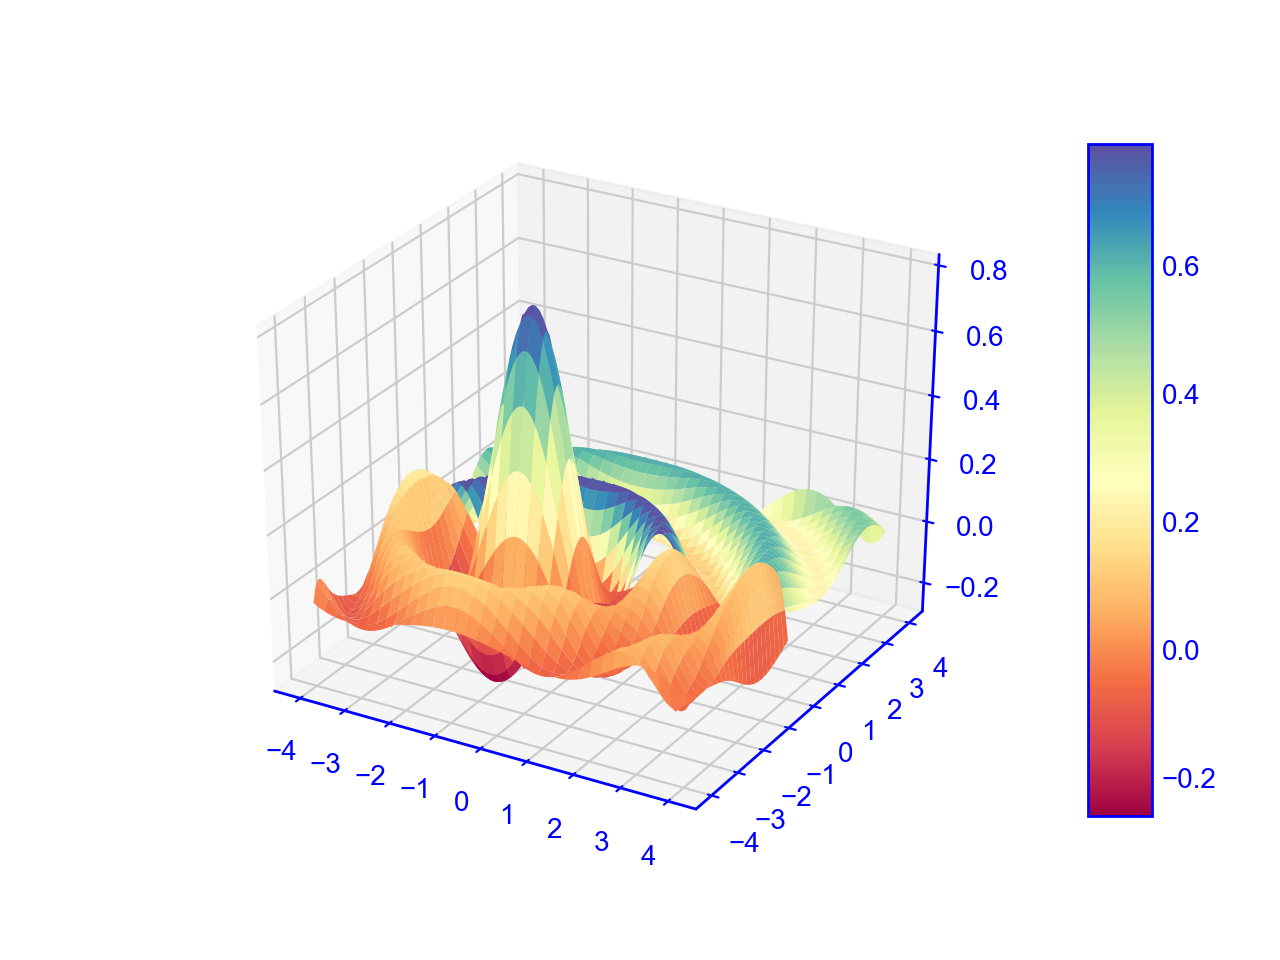

<IPython.core.display.Javascript object>


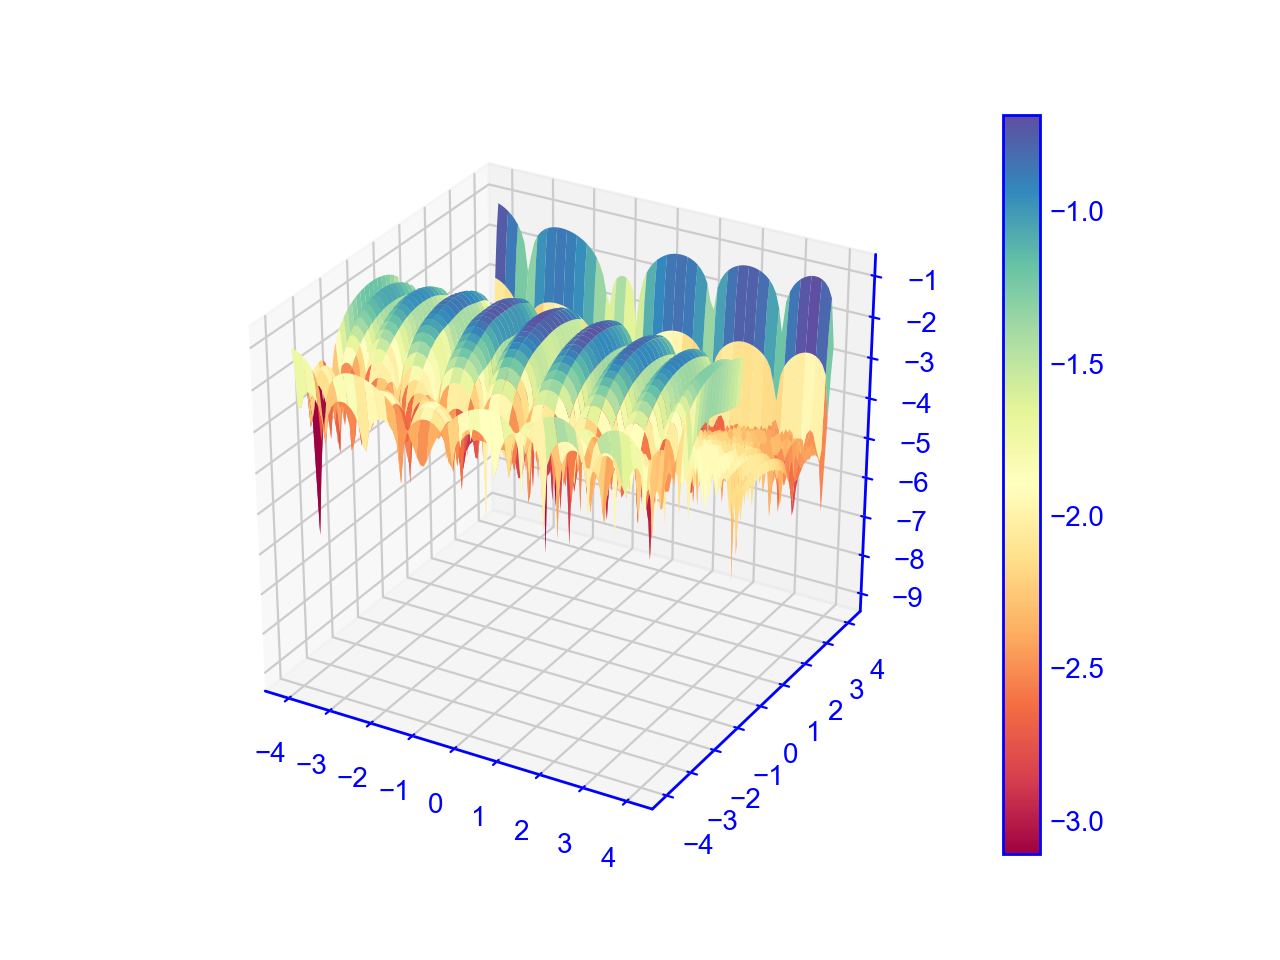


---- Starting Iteration: 4 ----
1 sending to 0: [ 2.00000000e+01  2.50000000e+01  5.47402065e-02  3.61683379e-02
 -7.10955287e-03 -6.98546191e-02 -1.00260263e-01 -7.76084073e-02
 -3.27890838e-02  8.64732712e-03  1.27474590e-02 -2.98103883e-02
 -8.92617570e-02 -1.03421456e-01 -5.39584145e-02  2.42947488e-02
  6.88627131e-02  5.61259030e-02 -2.84000862e-02 -8.87812537e-02
 -5.82157679e-02 -1.25361082e-02 -4.00000000e+00 -4.00000000e+00
 -4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -3.50000000e+00
 -3.00000000e+00 -2.50000000e+00 -2.00000000e+00 -1.50000000e+00
 -1.00000000e+00 -5.00000000e-01  0.00000000e+00  5.00000000e-01
  1.00000000e+00  1.50000000e+00  2.00000000e+00  2.50000000e+00
  3.00000000e+00  3.50000000e+00  4.00000000e+00  4.00000000e+00
  4.00000000e+00  4.00000000e+00  4.00000000e+00] to direction (-1 0)
0 sending to 1: [ 1.00000000e+01  1.50000000e+01 -2.67425574e-02 -5.78712299e-02
 -7.04175353e-02 -8.41761680e-03  1.79119812e-02 -5.27589802e-02
 -8.91486296e-02  1.

NURBSInterp Right proj:  (10,) (25,) (15,) (101,)
2  - Applying the constrained solver.
Left  [0.]
Right  [-2.67425574e-02 -3.36863669e-02 -3.96150231e-02 -4.45864745e-02
 -4.86579530e-02 -5.18859743e-02 -5.43263376e-02 -5.60341257e-02
 -5.70637048e-02 -5.74687249e-02 -5.73021195e-02 -5.66161058e-02
 -5.54621844e-02 -5.38911395e-02 -5.19530390e-02 -4.96972342e-02
 -4.71723603e-02 -4.44263349e-02 -4.15061544e-02 -3.84569735e-02
 -3.53216621e-02 -3.21407921e-02 -2.89526372e-02 -2.57931734e-02
 -2.26960788e-02 -1.96927332e-02 -1.68122187e-02 -1.40813194e-02
 -1.15245213e-02 -9.16401271e-03 -7.01968365e-03 -5.10912636e-03
 -3.44763508e-03 -2.04820609e-03 -9.21538264e-04 -7.60525922e-05
  4.82067369e-04  7.48866510e-04  7.22618137e-04  4.03823966e-04
 -2.04785870e-04 -1.09825283e-03 -2.26938995e-03 -3.70878186e-03
 -5.40478478e-03 -7.34352651e-03 -9.50890644e-03 -1.18825955e-02
 -1.44440364e-02 -1.71704431e-02 -2.00368015e-02 -2.30158850e-02
 -2.60784336e-02 -2.91933319e-02 -3.23276258e-02 

Iteration:  43
Residual =  1.9616530701002892  and res_dec =  10.994190650309678  and constraint =  3.7984372217887054e-05
Iteration:  44
Residual =  1.9616365802411715  and res_dec =  10.992948437544257  and constraint =  3.7984386414453347e-05
Iteration:  45
Residual =  1.9616293039528254  and res_dec =  10.994040224579875  and constraint =  3.798437167448685e-05
Iteration:  46
Residual =  1.9616242109841215  and res_dec =  10.99329898973966  and constraint =  3.7984373607632605e-05
Iteration:  47
Residual =  1.9616190884562725  and res_dec =  10.994451992323155  and constraint =  3.798437242211992e-05
Iteration:  48
Residual =  1.9616141177577497  and res_dec =  10.994821029363845  and constraint =  3.798438175254048e-05
Iteration:  49
Residual =  1.9616105704509743  and res_dec =  10.99499836946932  and constraint =  3.7984375329331126e-05
Iteration:  50
Residual =  1.9616077483310088  and res_dec =  10.99328598212307  and constraint =  3.7984371275058116e-05
Iteration:  51
Residua

<IPython.core.display.Javascript object>


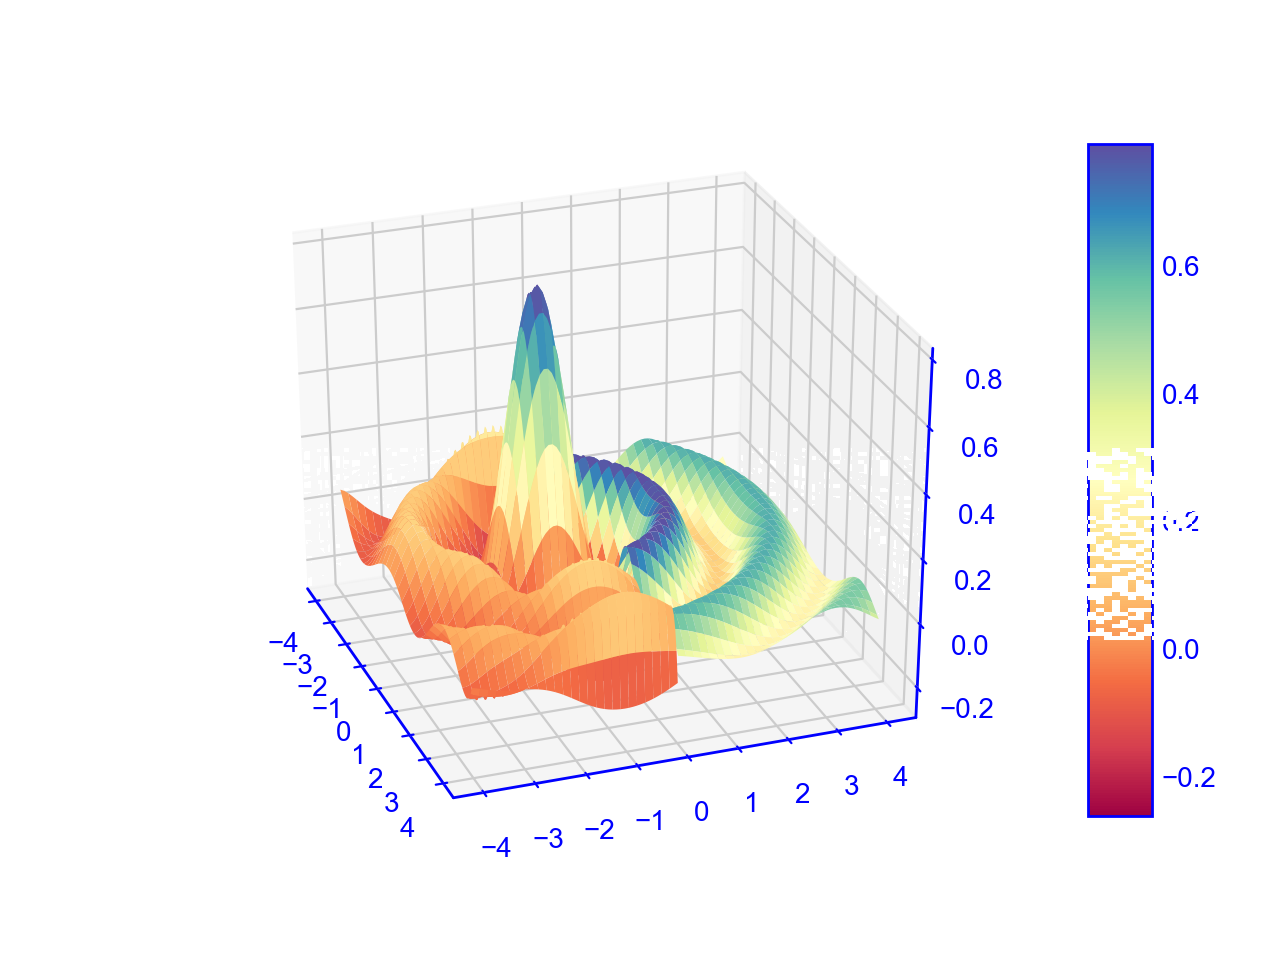

<IPython.core.display.Javascript object>


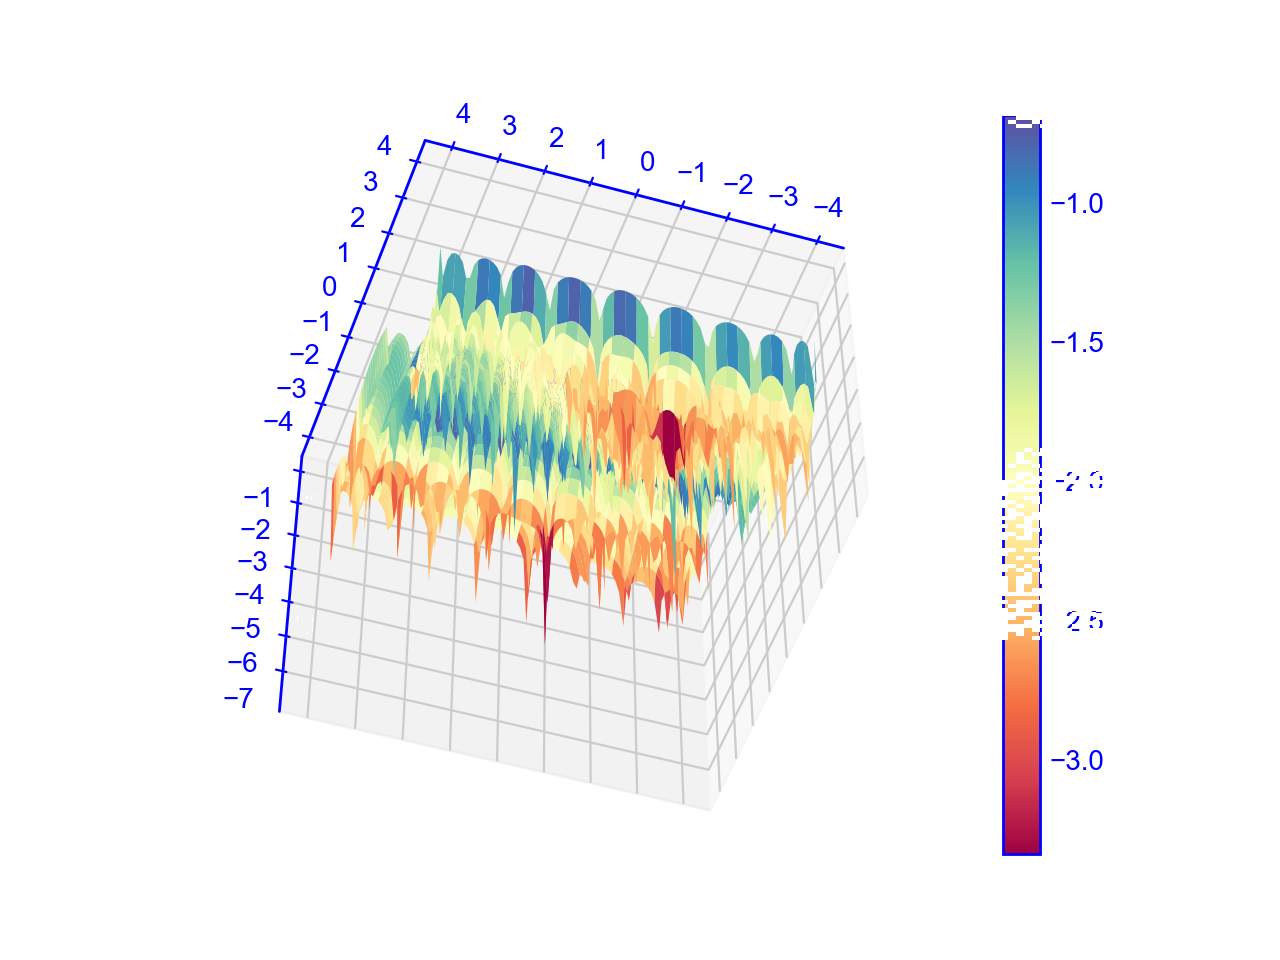

Domain:  2 Exact =  [[-0.04912249 -0.02767757 -0.00362393 ...  0.01162575 -0.00409975
  -0.01910763]
 [-0.05571838 -0.03563624 -0.01261426 ...  0.00823847 -0.00735691
  -0.02205239]
 [-0.06222884 -0.04370284 -0.0219238  ...  0.00460367 -0.01080672
  -0.02512815]
 ...
 [-0.0457997  -0.04996307 -0.05326563 ...  0.02178722  0.0140324
   0.00589681]
 [-0.03749578 -0.04272798 -0.04722963 ...  0.0140324   0.00602865
  -0.00209874]
 [-0.02764778 -0.03366679 -0.03910919 ...  0.00589681 -0.00209874
  -0.00996722]]
Domain:  2 Exact - Decoded =  [[ 7.08947812e-05 -1.00761767e-04 -1.13145308e-04 ... -7.15179508e-05
  -4.39044863e-05  3.66052380e-05]
 [ 7.03269565e-05 -1.01286872e-04 -1.09340243e-04 ... -7.26605347e-05
  -4.80524676e-05  3.86102313e-05]
 [ 6.90247834e-05 -1.01675981e-04 -1.05371581e-04 ... -7.35616083e-05
  -5.21173741e-05  4.05624706e-05]
 ...
 [ 7.28140532e-05 -5.76396313e-06 -4.17596603e-05 ... -3.11513415e-05
   1.23854307e-05  6.34549855e-05]
 [-4.78722643e-05 -8.81111342e-06 

In [3]:
from autograd import elementwise_grad as egrad
from scipy import linalg, matrix
from scipy.optimize import minimize, linprog
from scipy.linalg import svd

from autograd.numpy import linalg as LA

EPS    = 1e-32
GTOL   = 1e-2
basis  = lambda u,p,T: ((T[:-1]<=u) * (u<=T[1:])).astype(np.float) if p==0 else                     ((u - T[:-p]) /(T[p:]  -T[:-p]+EPS))[:-1] * basis(u,p-1,T)[:-1] +                     ((T[p+1:] - u)/(T[p+1:]-T[1:-p]+EPS))     * basis(u,p-1,T)[1:]


def getControlPoints(knots, k):
    nCtrlPts = len(knots) - 1 - k
    cx       = np.zeros(nCtrlPts)
    for i in range(nCtrlPts):
        tsum = 0
        for j in range(1, k + 1):
            tsum += knots[i + j]
        cx[i] = float(tsum) / k
    return cx


def decode(P, W, degree, Nu, Nv):
    Nu = Nu[...,np.newaxis]
    Nv = Nv[:,np.newaxis]
    NN = []
    for ui in range(Nu.shape[0]):
        for vi in range(Nv.shape[0]):
          NN.append(Nu[ui]*Nv[vi])  
    NN = np.array(NN)

    decoded = np.tensordot(NN, P * W) / np.tensordot(NN, W)
    return decoded.reshape((Nu.shape[0], Nv.shape[0]))
#     RNx = N[0] * np.sum(W, axis=0)
#     RNx /= np.sum(RNx, axis=1)[:,np.newaxis]
#     RNy = N[1] * np.sum(W, axis=1)
#     RNy /= np.sum(RNy, axis=1)[:,np.newaxis]
#     return np.matmul(np.matmul(RNx, P), RNy.T)

def Error(P, W, z, degree, Nu, Nv):
    return decode(P, W, degree, Nu, Nv) - z

def RMSE(P, W, z, degree, Nu, Nv):
    E = Error(P, W, z, degree, Nu, Nv)
    return math.sqrt(np.sum(E**2)/len(E))

def NMaxError(P, W, z, degree, Nu, Nv):
    E = Error(P, W, z, degree, Nu, Nv)
    return np.abs(E).max()/zRange

def NMSE(P, W, z, degree, Nu, Nv):
    return (Error(P, W, z, degree, Nu, Nv)**2).mean()/zRange


def toHomogeneous(P, W):
    return np.hstack( ( (P*W)[:,np.newaxis], W[:,np.newaxis]) )

def fromHomogeneous(PW):
    P = PW[:,0]
    W = PW[:,1]
    return P/W, W


def deCasteljau(P, W, T, u, k, r=1):
    NP = len(P)
    Qnew = np.zeros( (NP+r, P.ndim+1) )
    Rw = np.zeros( (degree+1, P.ndim+1) )
    PW = toHomogeneous(P, W)

    mp = NP+degree+1
    nq = len(Qnew)

    Qnew[:k-degree+1] = PW[:k-degree+1]
    Qnew[k+r:NP+1+r] = PW[k:NP+1]
    Rw[:degree+1] = PW[k-degree:k+1]


    for j in range(1,r+1):
        L = k-degree+j
        for i in range(degree-j+1):
            alpha = (u-T[L+i])/(T[i+k+1]-T[L+i])
            Rw[i] = alpha*Rw[i+1] + (1.0-alpha)*Rw[i]

        Qnew[L] = Rw[0]
        Qnew[k+r-j] = Rw[degree-j]
        Qnew[L+1:k] = Rw[1:k-L]

    P,W = fromHomogeneous(Qnew)
    return P,W

def L2LinfErrors(P, W, z, degree, Nu, Nv):

    E = Error(P, W, z, degree, Nu, Nv)
    LinfErr = np.abs(E).max()/zRange
    L2Err = math.sqrt(np.sum(E**2)/len(E))
    return [L2Err, LinfErr]

def lsqFit(Nu, Nv, W, z, degree, use_cho=True, constraints=None, continuity=0):
    if constraints is None or len(constraints)==0:
        RNx = Nu * np.sum(W, axis=1)
        RNx /= np.sum(RNx, axis=1)[:,np.newaxis]
        RNy = Nv * np.sum(W, axis=0)
        RNy /= np.sum(RNy, axis=1)[:,np.newaxis]
        if use_cho:
            X = linalg.cho_solve(linalg.cho_factor(np.matmul(RNx.T,RNx)), RNx.T)
            Y = linalg.cho_solve(linalg.cho_factor(np.matmul(RNy.T,RNy)), RNy.T)
#             print('Solver lsqfit shapes: ', Nu.shape, Nv.shape, X.shape, Y.shape, z.shape)
            return np.matmul(X, np.matmul(z, Y.T)), []
#             return np.matmul(X.T, np.matmul(Y, z)), []
        else:
            NTNxInv = np.linalg.inv(np.matmul(RNx.T,RNx))
            NTNyInv = np.linalg.inv(np.matmul(RNy.T,RNy))
            NxTQNy = np.matmul(RNx.T, np.matmul(z, RNy))
            return np.matmul(NTNxInv, np.matmul(NxTQNy, NTNyInv)), []
#             NTNxInv = np.linalg.inv(np.matmul(RNx.T,RNx))
#             NTNyInv = np.linalg.inv(np.matmul(RNy.T,RNy))
#             NxTQNy = np.matmul(RNx.T, np.matmul(z, RNy))
#             return np.matmul(NTNxInv, np.matmul(NxTQNy, NTNyInv)), []
    else:
        return lsqFitWithCons(Nu, Nv, W, z, degree, cons=constraints, continuity=continuity)


# Let do the recursive iterations
# The variable `additiveSchwartz` controls whether we use
# Additive vs Multiplicative Schwartz scheme for DD resolution
####
class InputControlBlock2:

    def __init__(self, bid, nCPi, xb, xl, yl, zl):
        if projectData:
            nCP = nCPi * (bid+1)
        else:
            nCP = nCPi
        self.nControlPoints = np.array([nCP, nCP])
        self.nControlPointSpans = np.array([nCP-1, nCP-1])
        self.nInternalKnotSpans = np.array([nCP - degree, nCP - degree])
        self.nPointsPerSubDX = len(xl)#int(nPointsX / nSubDomainsX)
        self.nPointsPerSubDY = len(yl)#int(nPointsY / nSubDomainsY)
        self.xbounds = xb
        self.xl = xl
        self.yl = yl
        self.zl = zl
        self.pAdaptive = np.zeros(self.nControlPoints)
        self.WAdaptive = np.ones(self.nControlPoints)
        self.knotsAdaptiveU = np.zeros(nCP+degree+1)
        self.knotsAdaptiveV = np.zeros(nCP+degree+1)
        self.knotsAll = []
        self.U = []
        self.V = []
        self.Nu = []
        self.Nv = []
        self.Dmini = []
        self.Dmaxi = []
        self.leftconstraint = np.zeros(1)
        self.rightconstraint = np.zeros(1)
        self.topconstraint = np.zeros(1)
        self.bottomconstraint = np.zeros(1)
        self.leftconstraintKnots = np.zeros(1)
        self.rightconstraintKnots = np.zeros(1)
        self.topconstraintKnots = np.zeros(1)
        self.bottomconstraintKnots = np.zeros(1)
        self.figHnd = None
        self.figHndErr = None
        self.globalIterationNum = 0
        self.adaptiveIterationNum = 0
        self.globalTolerance = 1e-3

    def show(self, cp):
        self.Dmini = np.array([min(self.xl), min(self.yl)])
        self.Dmaxi = np.array([max(self.xl), max(self.yl)])

        print("Rank: %d, Subdomain %d: Bounds = [%d - %d, %d - %d]" % (w.rank, cp.gid(), self.xbounds.min[0], self.xbounds.max[0], self.xbounds.min[1], self.xbounds.max[1]))
        # print("X/Y bounds (min/max) = ", self.Dmini, self.Dmaxi)
        #cp.enqueue(diy.BlockID(1, 0), "abc")

    def plot_control(self, cp):
#         print(w.rank, cp.gid(), self.core)
        # plotFit3D(NuA, NvA, PA, WA, knotsA_U, knotsA_V, x, y, z, degree, decoded=decoded)

#         self.figHnd = plt.figure()

#         self.Nu = basis(self.U[np.newaxis,:],degree,self.knotsAdaptiveU[:,np.newaxis]).T
#         self.Nv = basis(self.V[np.newaxis,:],degree,self.knotsAdaptiveV[:,np.newaxis]).T
#         decoded = E+z

        self.pMK = decode(self.pAdaptive, self.WAdaptive, degree, self.Nu, self.Nv)

        axHnd = self.figHnd.gca(projection='3d')

#         Xi, Yi = np.meshgrid(self.xl, self.yl)
        Xi, Yi = np.meshgrid(self.yl, self.xl)
#         surf = axHnd.plot_surface(Xi, Yi, self.zl, cmap=cm.coolwarm, antialiased=True, alpha=0.75, label='Input')
#         print('Plot shapes: ', Xi.shape, Yi.shape, self.pMK.shape)
        surf = axHnd.plot_surface(Xi, Yi, self.pMK, cmap=cm.Spectral, label='Decoded')
#         surf = axHnd.plot_surface(Xi, Yi, errorDecoded, cmap=cm.Spectral, label='Error')

        surf._facecolors2d=surf._facecolors3d
        surf._edgecolors2d=surf._edgecolors3d

        if cp.gid() == 0:
#             self.figHnd.colorbar(surf)
            #cbar_ax = self.figHnd.add_axes([min(xl), max(xl), 0.05, 0.7])
            self.figHnd.subplots_adjust(right=0.8)
            cbar_ax = self.figHnd.add_axes([0.85, 0.15, 0.05, 0.7])

            self.figHnd.colorbar(surf, cax=cbar_ax)

        # Let us plot the control point data.
#         coeffs_y = getControlPoints(self.knotsAdaptiveV, degree)
#         coeffs_x = getControlPoints(self.knotsAdaptiveU, degree)
#         X, Y = np.meshgrid(coeffs_y, coeffs_x)
#         surf = axHnd.plot_surface(X, Y, self.pAdaptive, cmap=cm.coolwarm, antialiased=True, alpha=0.75, label='Input')
#         surf = axHnd.plot_wireframe(X, Y, self.pAdaptive, linestyle='--', color='r', alpha=0.5, label='Control')


#         plotFit3D(self.figHnd, self.Nu, self.Nv, self.pAdaptive, self.WAdaptive, self.knotsAdaptiveU, self.knotsAdaptiveV, 
#                   self.xl, self.yl, self.zl, degree, decoded=self.pMK, noDec=True)

#         plot3D(fig, self.pMK, coeffs_x, coeffs_y)
#         print("Shapes: [x, y, z] = ", self.xl.shape, self.yl.shape, self.zl.shape)
#         plotFit3D(fig, NuA, NvA, self.pAdaptive, self.WAdaptive, self.knotsAdaptiveU, self.knotsAdaptiveV,
#                  self.xl, self.yl, self.zl, degree, decoded=None)

    
    def plot_error(self, cp):

        self.pMK = decode(self.pAdaptive, self.WAdaptive, degree, self.Nu, self.Nv)
        errorDecoded = self.zl - self.pMK
#         print ("zl = ", self.zl)
#         print ("Decoded = ", self.pMK)

        axHnd = self.figHndErr.gca(projection='3d')

        Xi, Yi = np.meshgrid(self.yl, self.xl)
        surf = axHnd.plot_surface(Xi, Yi, np.log10(np.abs(errorDecoded)), cmap=cm.Spectral, label='Error')

        surf._facecolors2d=surf._facecolors3d
        surf._edgecolors2d=surf._edgecolors3d
        
        if cp.gid() == 0:
            self.figHndErr.colorbar(surf)
#             axHnd.legend()

    def set_fig_handles(self, cp, fig=None, figerr=None):
        self.figHnd = fig
        self.figHndErr = figerr
        
    def print_solution(self, cp):
#         self.pMK = decode(self.pAdaptive, self.WAdaptive, degree, self.Nu, self.Nv)
#         errorDecoded = self.zl - self.pMK

        print("Domain: ", cp.gid()+1, "Exact = ", self.zl)
        print("Domain: ", cp.gid()+1, "Exact - Decoded = ", self.zl - self.pMK)

    def send(self, cp):
        link = cp.link()
        for i in range(len(link)):
            target = link.target(i)
            o = np.zeros(1)
            if len(self.pAdaptive):
                dir = link.direction(i)
                if dir[0] == 0 and dir[1] == 0:
                    continue;

                o = np.zeros(2+self.knotsAdaptiveU.shape[0]+self.knotsAdaptiveV.shape[0])
                o[0] = self.knotsAdaptiveU.shape[0]
                o[1] = self.knotsAdaptiveV.shape[0]

                o[2:self.knotsAdaptiveU.shape[0]+2] = self.knotsAdaptiveU[:]
                o[self.knotsAdaptiveU.shape[0]+2:] = self.knotsAdaptiveV[:]

                # ONLY consider coupling through faces and not through verties
                # This means either dir[0] or dir[1] has to be "0" for subdomain coupling to be active
                # Hence we only consider 4 neighbor cases, instead of 8.
                if dir[0] == 0: # target is coupled in Y-direction
                    if dir[1] > 0: # target block is above current subdomain
                        pl = len(self.pAdaptive[:, -1])
                        o = np.zeros(2+pl+self.knotsAdaptiveU.shape[0])
                        o[0] = pl
                        o[1] = self.knotsAdaptiveU.shape[0]

                        o[2:pl+2] = self.pAdaptive[:, -1]
                        o[pl+2:] = self.knotsAdaptiveU[:]
                    else: # target block is below current subdomain
                        pl = len(self.pAdaptive[:, 0])
                        o = np.zeros(2+pl+self.knotsAdaptiveU.shape[0])
                        o[0] = pl
                        o[1] = self.knotsAdaptiveU.shape[0]

                        o[2:pl+2] = self.pAdaptive[:, 0]
                        o[pl+2:] = self.knotsAdaptiveU[:]
                    
                if dir[1] == 0: # target is coupled in Y-direction
                    if dir[0] > 0: # target block is to the right of current subdomain
                        pl = len(self.pAdaptive[0, :])
                        o = np.zeros(2+pl+self.knotsAdaptiveV.shape[0])
                        o[0] = pl
                        o[1] = self.knotsAdaptiveV.shape[0]

                        o[2:pl+2] = self.pAdaptive[0, :]
                        o[pl+2:] = self.knotsAdaptiveV[:]

                    else: # target block is to the left of current subdomain
                        pl = len(self.pAdaptive[-1, :])
                        o = np.zeros(2+pl+self.knotsAdaptiveV.shape[0])
                        o[0] = pl
                        o[1] = self.knotsAdaptiveV.shape[0]

                        o[2:pl+2] = self.pAdaptive[-1, :]
                        o[pl+2:] = self.knotsAdaptiveV[:]

            if len(o) > 1:
                print("%d sending to %d: %s to direction %s" % (cp.gid(), target.gid, o, dir))
            cp.enqueue(target, o)

    def recv(self, cp):
        link = cp.link()
        for i in range(len(link)):
            tgid = link.target(i).gid
            o = cp.dequeue(tgid)
            if len(o) == 1:
                continue

            pl = int(o[0])
            tl = int(o[1])
            dir = link.direction(i)
            print("%d received from %d: %s from direction %s, with sizes %d+%d" % (cp.gid(), tgid, o, dir, pl, tl))
            

            # ONLY consider coupling through faces and not through verties
            # This means either dir[0] or dir[1] has to be "0" for subdomain coupling to be active
            # Hence we only consider 4 neighbor cases, instead of 8.
            if dir[0] == 0 and dir[1] == 0:
                continue;
            if dir[0] == 0: # target is coupled in Y-direction
                if dir[1] > 0: # target block is above current subdomain
                    self.topconstraint = np.array(o[2:pl+2]) if pl > 0 else []
                    self.topconstraintKnots = np.array(o[pl+2:]) if tl > 0 else []
                else: # target block is below current subdomain
                    self.bottomconstraint = np.array(o[2:pl+2]) if pl > 0 else []
                    self.bottomconstraintKnots = np.array(o[pl+2:]) if tl > 0 else []

            if dir[1] == 0: # target is coupled in Y-direction
                if dir[0] > 0: # target block is above current subdomain
                    self.leftconstraint = np.array(o[2:pl+2]) if pl > 0 else []
                    self.leftconstraintKnots = np.array(o[pl+2:]) if tl > 0 else []
                else: # target block is below current subdomain
                    self.rightconstraint = np.array(o[2:pl+2]) if pl > 0 else []
                    self.rightconstraintKnots = np.array(o[pl+2:]) if tl > 0 else []
                    print('Right received:', self.rightconstraint, self.rightconstraintKnots)


    def LSQFit_NonlinearOptimize(self, idom, W, degree, constraintsAll=None):

        from scipy.optimize import root, anderson, newton_krylov#, BroydenFirst, KrylovJacobian

        constraints = None
        jacobian_const = None
        solution = []

        # Initialize relevant data
        if constraintsAll is not None:
            constraints = constraintsAll['P'][:,:].reshape(W.shape)
            knotsAllU = constraintsAll['Tu']
            knotsAllV = constraintsAll['Tv']
            weightsAll = constraintsAll['W']
            left = constraintsAll['left']
            leftknots = constraintsAll['leftknots']
            right = constraintsAll['right']
            rightknots = constraintsAll['rightknots']
            top = constraintsAll['top']
            topknots = constraintsAll['topknots']
            bottom = constraintsAll['bottom']
            bottomknots = constraintsAll['bottomknots']
            initSol = constraints[:,:]

            # print('Left ', left)
            # print('Right ', right)
            # print('Subdomain ', idom, left.shape, right.shape, top.shape, bottom.shape)
            

        else:
            print ('Constraints are all null. Solving unconstrained.')
            initSol = np.ones_like(W)

        # Compute the residual as sum of two components
        # 1. The decoded error evaluated at P
        # 2. A penalized domain boundary constraint component
        def residual(Pin, verbose=False):
            bc_penalty = 1e5
            norm_type = np.inf#2
            
            P = Pin.reshape(W.shape)

            Nu = self.Nu[...,np.newaxis]
            Nv = self.Nv[:,np.newaxis]
            NN = []
            for ui in range(Nu.shape[0]):
                for vi in range(Nv.shape[0]):
                  NN.append(Nu[ui]*Nv[vi])  
            NN = np.array(NN)

            decoded = np.tensordot(NN, P * W) / np.tensordot(NN, W)

            # Residuals are in the decoded space - so direct way to constrain the boundary data
            res_dec = ( decoded.reshape(Nu.shape[0],Nv.shape[0]) - self.zl )
            residual = res_dec.reshape(self.Nu.shape[0]*self.Nv.shape[0])

#             res1 = np.dot(res_dec, self.Nv)
#             residual = np.dot(self.Nu.T, res1).reshape(self.Nu.shape[1]*self.Nv.shape[1])

            def decode1D(P, W, x, t):
                return np.array([(np.sum(basis(x[u],degree,t) *P*W)/(np.sum(basis(x[u],degree,t)*W))) for u,_ in enumerate(x)])

            interpOrder = 'cubic'
            constraintRes = 0
            if constraints is not None and len(constraints) > 0:
                if len(left) > 1:
                    if useDecodedConstraints:
                        leftdata = decode1D(P[0,:], np.ones(P[0,:].shape), self.yl, self.knotsAdaptiveV)
                        constraintRes += np.sum( ( leftdata[:] - left[:] )**2 ) / len(leftdata)
                    else:
                        ctrlpts_pos = getControlPoints(self.knotsAdaptiveV, degree)
                        ctrlpts_ppos = getControlPoints(leftknots, degree)
                        rbf = Rbf(ctrlpts_ppos, left, function=interpOrder)
                        leftdata = rbf(ctrlpts_pos)
                        constraintRes += np.sum( ( P[0,:] - leftdata[:] )**2 ) / len(leftdata)
                if len(right) > 1:
                    # print('Right Shapes knots: ', len(right[:]), len(self.knotsAdaptiveU), self.yl.shape)
                    if useDecodedConstraints:
                        rightdata = decode1D(P[-1,:], np.ones(P[-1,:].shape), self.yl, self.knotsAdaptiveV)
                        constraintRes += np.sum( ( rightdata[:] - right[:] )**2 ) / len(rightdata)
                    else:
                        ctrlpts_pos = getControlPoints(self.knotsAdaptiveV, degree)
                        ctrlpts_ppos = getControlPoints(rightknots, degree)
                        rbf = Rbf(ctrlpts_ppos, right, function=interpOrder)
                        rightdata = rbf(ctrlpts_pos)
                        constraintRes += np.sum( ( P[-1,:] - rightdata[:] )**2 ) / len(rightdata)
                if len(top) > 1:
                    if useDecodedConstraints:
                        topdata = decode1D(P[:,-1], np.ones(P[:,-1].shape), self.xl, self.knotsAdaptiveU)
                        constraintRes += np.sum( ( topdata[:] - top[:] )**2 ) / len(topdata)
                    else:
                        ctrlpts_pos = getControlPoints(self.knotsAdaptiveU, degree)
                        ctrlpts_ppos = getControlPoints(topknots, degree)
                        rbf = Rbf(ctrlpts_ppos, top, function=interpOrder)
                        topdata = rbf(ctrlpts_pos)
                        constraintRes += np.sum( ( P[:,-1] - topdata[:] )**2 ) / len(topdata)
                if len(bottom) > 1:
                    if useDecodedConstraints:
                        bottomdata = decode1D(P[:,0], np.ones(P[:,0].shape), self.xl, self.knotsAdaptiveU)
                        constraintRes += np.sum( ( bottomdata[:] - bottom[:] )**2 ) / len(bottomdata)
                    else:
                        ctrlpts_pos = getControlPoints(self.knotsAdaptiveU, degree)
                        ctrlpts_ppos = getControlPoints(bottomknots, degree)
                        rbf = Rbf(ctrlpts_ppos, bottom, function=interpOrder)
                        bottomdata = rbf(ctrlpts_pos)
                        constraintRes += np.sum( ( P[:,0] - bottomdata[:] )**2 ) / len(bottomdata)

#             cons.append( {'type': 'eq', 'fun' : lambda x: LA.norm(x[:] - left[:]) - 1e-10

            alpha = bc_penalty * 0.5
            res = np.sqrt(np.sum(residual**2)/len(residual))/zRange + (alpha * np.sqrt(constraintRes))
#             res = LA.norm(residual, norm_type) + (alpha * np.sqrt(constraintRes))

            if verbose:
                print('Residual = ', res, ' and res_dec = ', LA.norm(res_dec, norm_type), ' and constraint = ', np.sqrt(constraintRes))

            return res

        def print_iterate(P):
#             global globalIterationNum

            # print('Iteration: ', self.globalIterationNum)
            res = residual(P, verbose=True)
            self.globalIterationNum += 1

        # Use automatic-differentiation to compute the Jacobian value for minimizer
        def jacobian(P):
#             if jacobian_const is None:
#                 jacobian_const = egrad(residual)(P)

            jacobian = egrad(residual)(P)
#             jacobian = jacobian_const
#             print('Jacobian = ', jacobian.shape)
            return jacobian

        #if constraintsAll is not None:
        #    jacobian_const = egrad(residual)(initSol)

        # Now invoke the solver and compute the constrained solution
        if constraints is None:
            print('Solver shapes: ', self.Nu.shape, self.Nv.shape, self.zl.shape)
            solution,_ = lsqFit(self.Nu, self.Nv, W, self.zl, degree)
            solution = solution.reshape(W.shape)
        else:
            
            print('Initial calculation')
            print_iterate(initSol)
            res = minimize(residual, x0=initSol, method=solverScheme, #'SLSQP', #'L-BFGS-B', #'TNC', 
                           jac=jacobian,
                           callback=print_iterate,
                           options={'disp': True, 'ftol': self.globalTolerance})
            print ('[%d] : %s' % (idom, res.message))
            solution = res.x.reshape(W.shape)

#             jac = BroydenFirst()
#             kjac = KrylovJacobian(inner_M=jac.inverse)
#             solution = newton_krylov(residual, initSol, verbose=True, jac=kjac)
#             solution = res.x

        return solution


    def interpolate(self, P, knots, tnew):

        r = 1
        Pnew = P[:]
        W = np.ones(Pnew.shape)

        # print('Original interpolation shapes: ', Pnew.shape[0], knots, tnew)
        # For all entries that are missing in self.knotsAdaptive, call castleDeJau 
        # and recompute control points one by one
        for knot in tnew:
            #knotInd = np.searchsorted(knots, knot)
            found = False
            # let us do a linear search
            for k in knots:
                if abs(k - knot) < 1e-10:
                    found = True
                    break

            if not found:
                knotInd = np.searchsorted(knots, knot)
                #if Pnew.shape[0] == knotInd:
                #    print('Knot index is same as length of control points')

                # print('New interpolation shapes: ', Pnew.shape[0], knots.shape[0], ' before inserting ', knot, ' at ', knotInd)
                Pnew,W = deCasteljau(Pnew[:], W[:], knots, knot, knotInd-1, r)
                knots = np.insert(knots, knotInd, knot)
        
        #cplocCtrPt = getControlPoints(knots, degree) * (Dmax - Dmin) + Dmin
        #coeffs_xy = getControlPoints(knots, degree)

        #return Pnew, knots, W
        return Pnew, knots

    def interpolate_spline(self, pold, coeffs_xy, ncoeffs_xy):
       
        interpOrder = 'linear' # 'linear', 'cubic', 'quintic'
        #InterpCp = interp1d(coeffs_x, self.pAdaptive, kind=interpOrder)
        InterpCp = Rbf(coeffs_xy, pold, function=interpOrder)

        Pnew = InterpCp(ncoeffs_xy)
        
        return Pnew

    def flatten(self, x):
        import collections
        if isinstance(x, collections.Iterable):
            return [a for i in x for a in self.flatten(i)]
        else:
            return [x]

    def adaptive(self, iSubDom, xl, yl, zl, strategy='extend', weighted=False, 
                 r=1, MAX_ERR=1e-2, MAX_ITER=5, 
                 split_all=False, 
                 decodedError=None):

        from scipy.interpolate import Rbf

        k = []
        r = min(r,degree) #multiplicity can not be larger than degree
        reuseE = (decodedError)/zRange if decodedError is not None else None

        splitIndeces = []
        r = min(r,degree) #multiplicity can not be larger than degree

        Tu = self.knotsAdaptiveU[:]
        Tv = self.knotsAdaptiveV[:]
        P = self.pAdaptive[:,:]
        W = self.WAdaptive[:,:]
        
        globalIterationNum = 0

        self.Nu = basis(self.U[np.newaxis,:],degree,Tu[:,np.newaxis]).T
        self.Nv = basis(self.V[np.newaxis,:],degree,Tv[:,np.newaxis]).T

        if (np.sum(P) == 0 and len(P) > 0) or len(P) == 0:
            #W = np.ones(self.nControlPoints)
            print(iSubDom, " - Applying the unconstrained solver.")
            P = self.LSQFit_NonlinearOptimize(iSubDom, W, degree, None)
#             P,_ = lsqFit(self.Nu, self.Nv, W, self.zl, degree)
#             print('Current P = ', P)
            decodedE = decode(P, W, degree, self.Nu, self.Nv) #- self.zl
#             print ('Local diff = ', self.zl-decodedE)
            MAX_ITER = 0

        interpOrder = 'cubic'
        iteration = 0
        for iteration in range(MAX_ITER):
            fev = 0

            if projectData:
                useDeCastelJau = True

                if not useDeCastelJau:
                    # Need to compute a projection from [P, Tu, Tv] to [Pnew, Tunew, Tvnew]
                    coeffs_x1 = getControlPoints(Tu, degree)
                    coeffs_y1 = getControlPoints(Tv, degree)

                    if iSubDom == 1:
                        if nSubDomainsY > 1:
                            coeffs_x2 = np.linspace(np.min(coeffs_x1), np.max(coeffs_x1), len(coeffs_x1)*2)
                            coeffs_y2 = coeffs_y1[:]
                        else:
                            coeffs_y2 = np.linspace(np.min(coeffs_y1), np.max(coeffs_y1), len(coeffs_y1)*2)
                            coeffs_x2 = coeffs_x1[:]
        #                 coeffs_y2 = coeffs_y1[::2]
                    else:
                        if nSubDomainsY > 1:
                            coeffs_x2 = coeffs_x1[:]
        #                     coeffs_x1 = coeffs_x2[::2]
                            coeffs_x1 = np.linspace(np.min(coeffs_x2), np.max(coeffs_x2), len(coeffs_x2)/2)
                            coeffs_y2 = coeffs_y1[:]
                        else:
                            coeffs_y2 = coeffs_y1[:]
        #                     coeffs_x1 = coeffs_x2[::2]
                            coeffs_y1 = np.linspace(np.min(coeffs_y2), np.max(coeffs_y2), len(coeffs_y2)/2)
                            coeffs_x2 = coeffs_x1[:]

                def decode1D(P, W, x, t):
                    return np.array([(np.sum(basis(x[u],degree,t) *P*W)/(np.sum(basis(x[u],degree,t)*W))) for u,_ in enumerate(x)])

                # Create a projection for also the solution vector along subdomain boundaries
                leftconstraint_projected = self.leftconstraint[:]
                leftconstraint_projected_knots = Tv[:]
                if len(self.leftconstraint) > 1:
                    if useDeCastelJau:
                        # print('NURBSInterp Left proj: ', self.leftconstraint.shape, Tu.shape, Tv.shape, self.leftconstraintKnots.shape)
                        if useDecodedConstraints:
                            leftconstraint_projected_cp, leftconstraint_projected_knots = self.interpolate(self.leftconstraint, self.leftconstraintKnots, Tv[:])
                            leftconstraint_projected = decode1D(leftconstraint_projected_cp, np.ones(leftconstraint_projected_cp.shape), self.yl, leftconstraint_projected_knots)
                        else:
                            leftconstraint_projected, leftconstraint_projected_knots = self.interpolate(self.leftconstraint, self.leftconstraintKnots, Tv[:])
                        # print('NURBSInterp Left proj: ', self.leftconstraint.shape, Tv.shape, self.leftconstraintKnots.shape, leftconstraint_projected.shape)
                    else:
#                     rbfL = Rbf(coeffs_y2, self.leftconstraint, function=interpOrder)
#                     leftconstraint_projected = rbfL(coeffs_y1)
                        # print('SplineInterp Left proj: ', coeffs_y2.shape, self.leftconstraint.shape)
                        leftconstraint_projected = self.interpolate_spline(self.leftconstraint, coeffs_y2, coeffs_y1)

                rightconstraint_projected = self.rightconstraint[:]
                rightconstraint_projected_knots = Tv[:]
                if len(self.rightconstraint) > 1:
                    if useDeCastelJau:
                        # print('NURBSInterp Right proj: ', self.rightconstraint.shape, Tu.shape, Tv.shape, self.rightconstraintKnots.shape)
                        if useDecodedConstraints:
                            rightconstraint_projected_cp, rightconstraint_projected_knots = self.interpolate(self.rightconstraint, self.rightconstraintKnots, Tv[:])
                            rightconstraint_projected = decode1D(rightconstraint_projected_cp, np.ones(rightconstraint_projected_cp.shape), self.yl, rightconstraint_projected_knots)
                        else:
                            rightconstraint_projected, rightconstraint_projected_knots = self.interpolate(self.rightconstraint, self.rightconstraintKnots, Tv[:])

                        # print('NURBSInterp Right proj: ', self.rightconstraint.shape, Tv.shape, self.rightconstraintKnots.shape, rightconstraint_projected.shape)
                    else:
#                     rbfR = Rbf(coeffs_y1, self.rightconstraint, function=interpOrder)
#                     rightconstraint_projected = rbfR(coeffs_y2)
                        # print('SplineInterp Right proj: ', coeffs_y1.shape, self.rightconstraint.shape)
                        rightconstraint_projected = self.interpolate_spline(self.rightconstraint, coeffs_y1, coeffs_y2)

                topconstraint_projected = self.topconstraint[:]
                topconstraint_projected_knots = Tu[:]
                if len(self.topconstraint) > 1:
                    if useDeCastelJau:
                        if useDecodedConstraints:
                            topconstraint_projected_cp, topconstraint_projected_knots = self.interpolate(self.topconstraint, self.topconstraintKnots, Tu[:])
                            topconstraint_projected = decode1D(topconstraint_projected_cp, np.ones(topconstraint_projected_cp.shape), self.xl, topconstraint_projected_knots)
                        else:
                            topconstraint_projected, topconstraint_projected_knots = self.interpolate(self.topconstraint, self.topconstraintKnots, Tu[:])

                    else:
                        topconstraint_projected = self.interpolate_spline(self.topconstraint, coeffs_x2, coeffs_x1)
#                     rbfT = Rbf(coeffs_x2, self.topconstraint, function=interpOrder)
#                     topconstraint_projected = rbfT(coeffs_x1)

                bottomconstraint_projected = self.bottomconstraint[:]
                bottomconstraint_projected_knots = Tu[:]
                if len(self.bottomconstraint) > 1:
                    if useDeCastelJau:
                        if useDecodedConstraints:
                            bottomconstraint_projected_cp, bottomconstraint_projected_knots = self.interpolate(self.bottomconstraint, self.bottomconstraintKnots, Tu[:])
                            bottomconstraint_projected = decode1D(bottomconstraint_projected_cp, np.ones(bottomconstraint_projected_cp.shape), self.xl, bottomconstraint_projected_knots)
                        else:
                            bottomconstraint_projected, bottomconstraint_projected_knots = self.interpolate(self.bottomconstraint, self.bottomconstraintKnots, Tu[:])
                    else:
                        bottomconstraint_projected = self.interpolate_spline(self.bottomconstraint, coeffs_x1, coeffs_x2)
#                     rbfB = Rbf(coeffs_x1, self.bottomconstraint, function=interpOrder)
#                     bottomconstraint_projected = rbfB(coeffs_x2)

            else:
                leftconstraint_projected = self.leftconstraint
                rightconstraint_projected = self.rightconstraint
                topconstraint_projected = self.topconstraint
                bottomconstraint_projected = self.bottomconstraint

            interface_constraints_obj = dict()
            interface_constraints_obj['P']=P[:,:]
            interface_constraints_obj['W']=W[:,:]
            interface_constraints_obj['Tu']=Tu[:]
            interface_constraints_obj['Tv']=Tv[:]
            interface_constraints_obj['left'] = leftconstraint_projected[:]
            interface_constraints_obj['leftknots'] = leftconstraint_projected_knots[:]
            interface_constraints_obj['right'] = rightconstraint_projected[:]
            interface_constraints_obj['rightknots'] = rightconstraint_projected_knots[:]
            interface_constraints_obj['top'] = topconstraint_projected[:]
            interface_constraints_obj['topknots'] = topconstraint_projected_knots[:]
            interface_constraints_obj['bottom'] = bottomconstraint_projected[:]
            interface_constraints_obj['bottomknots'] = bottomconstraint_projected_knots[:]

            print(iSubDom, " - Applying the constrained solver.")
            P = self.LSQFit_NonlinearOptimize(iSubDom, W, degree, interface_constraints_obj)

#             if len(self.leftconstraint) > 1:
#                 print('Errors-left: ', P[0,:]-leftconstraint_projected[:])
#             if len(self.rightconstraint) > 1:
#                 print('Errors-right: ', P[-1,:]-rightconstraint_projected[:])
#             if len(self.topconstraint) > 1:
#                 print('Errors-top: ', P[:,-1]-topconstraint_projected[:])
#             if len(self.bottomconstraint) > 1:
#                 print('Errors-bottom: ', P[:,0]-bottomconstraint_projected[:])

            decoded = decode(P, W, degree, self.Nu, self.Nv)
            decodedError = np.array(decoded-self.zl)

            reuseE = (decodedError)/zRange
            print("\tDecoded error: ", LA.norm(reuseE, 'fro'))

            iteration += 1

        return P, W, Tu, Tv, np.array([k]), decodedError

    def solve_adaptive(self, cp):

        ## Subdomain ID: iSubDom = cp.gid()+1
        newSolve = False
        if (np.sum(self.pAdaptive) == 0 and len(self.pAdaptive) > 0) or len(self.pAdaptive) == 0:
            newSolve = True

        if not newSolve:

            self.nControlPointSpans = self.nControlPoints - 1
            self.nInternalKnotSpans = self.nControlPoints - degree

        inc = (self.Dmaxi - self.Dmini) / self.nInternalKnotSpans
        # print ("self.nInternalKnotSpans = ", self.nInternalKnotSpans, " inc = ", inc)
        if (len(self.knotsAdaptiveU) == 0) or (len(self.knotsAdaptiveU) > 0 and np.sum(self.knotsAdaptiveU) == 0):
            tu   = np.linspace(self.Dmini[0] + inc[0], self.Dmaxi[0] - inc[0], self.nInternalKnotSpans[0] - 1)
            tv   = np.linspace(self.Dmini[1] + inc[1], self.Dmaxi[1] - inc[1], self.nInternalKnotSpans[1] - 1)
            self.knotsAdaptiveU = np.concatenate(([self.Dmini[0]] * (degree+1), tu, [self.Dmaxi[0]] * (degree+1)))
            self.knotsAdaptiveV = np.concatenate(([self.Dmini[1]] * (degree+1), tv, [self.Dmaxi[1]] * (degree+1)))

        self.U    = np.linspace(self.Dmini[0], self.Dmaxi[0], self.nPointsPerSubDX)#self.nPointsPerSubDX, nPointsX
        self.V    = np.linspace(self.Dmini[1], self.Dmaxi[1], self.nPointsPerSubDY)#self.nPointsPerSubDY, nPointsY

        print ("Subdomain -- ", cp.gid())

        # Let do the recursive iterations
        # Use the previous MAK solver solution as initial guess; Could do something clever later

        # Invoke the adaptive fitting routine for this subdomain
        adaptiveErr = None
        self.globalTolerance = 1e-3 * 1e-1**self.adaptiveIterationNum
        self.pAdaptive, self.WAdaptive, self.knotsAdaptiveU, self.knotsAdaptiveV, kv, adaptiveErr = self.adaptive(cp.gid()+1,
                                       self.xl, self.yl, self.zl,
                                       strategy=AdaptiveStrategy, weighted=False,
                                       r=1, MAX_ERR=maxAbsErr, MAX_ITER=maxAdaptIter, #MAX_ERR=maxAdaptErr,
                                       split_all=False,
                                       decodedError=adaptiveErr)
        self.adaptiveIterationNum += 1

#         print("adaptiveErr: ", self.pAdaptive.shape, self.WAdaptive.shape, self.zl.shape, self.Nu.shape, self.Nv.shape)
        errorMAK = L2LinfErrors(self.pAdaptive, self.WAdaptive, self.zl, degree, self.Nu, self.Nv)

    def send_knots_to_root(self, cp):
        link = cp.link()
        for i in range(len(link)):
            tgid = link.target(i).gid

        root = 0#link.target(i)
        if cp.gid() != root:
            o = np.zeros(2+self.knotsAdaptiveU.shape[0]+self.knotsAdaptiveV.shape[0])
            o[0] = self.knotsAdaptiveU.shape[0]
            o[1] = self.knotsAdaptiveV.shape[0]
            
            o[2:self.knotsAdaptiveU.shape[0]+2] = self.knotsAdaptiveU[:]
            o[self.knotsAdaptiveU.shape[0]+2:] = self.knotsAdaptiveV[:]
            cp.enqueue(root, o)

    def recv_knots_on_root(self, cp):
        link = cp.link()
        tgid = link.target(i).gid
        if cp.gid() == root:
            o = cp.dequeue(tgid)
            self.knotsAll[tgid] = o

#########

# Initialize DIY
mc2 = diy.Master(w)         # master
domain_control2 = diy.DiscreteBounds([0,0], [len(x)-1,len(y)-1])

# Routine to recursively add a block and associated data to it
def add_input_control_block2(gid, core, bounds, domain, link):
    # print("Subdomain %d: " % gid, core, bounds, domain)
    minb = bounds.min
    maxb = bounds.max
    print("Subdomain %d: " % gid, minb[0], minb[1], maxb[0], maxb[1])
    xlocal = x[minb[0]:maxb[0]+1]
    ylocal = y[minb[1]:maxb[1]+1]
#     zlocal = z[minb[1]:maxb[1]+1,minb[0]:maxb[0]+1]
    zlocal = z[minb[0]:maxb[0]+1,minb[1]:maxb[1]+1]

    mc2.add(gid, InputControlBlock2(gid,nControlPointsInput,core,xlocal,ylocal,zlocal), link)

# TODO: If working in parallel with MPI or DIY, do a global reduce here
showplot = True

errors = np.zeros([maxIterASM,2]) # Store L2, Linf errors as function of iteration

# Let us initialize DIY and setup the problem
share_face = [True,True]
wrap = [False,False]
ghosts = [0,0]
divisions = [nSubDomainsX,nSubDomainsY]

d_control2 = diy.DiscreteDecomposer(2, domain_control2, nSubDomainsX*nSubDomainsY, share_face, wrap, ghosts, divisions)
a_control2 = diy.ContiguousAssigner(w.size, nSubDomainsX*nSubDomainsY)

d_control2.decompose(w.rank, a_control2, add_input_control_block2)

mc2.foreach(InputControlBlock2.show)

#########
for iterIdx in range(maxIterASM):

    print ("\n---- Starting Iteration: %d ----" % iterIdx)
    
    # Now let us perform send-receive to get the data on the interface boundaries from 
    # adjacent nearest-neighbor subdomains
    mc2.foreach(InputControlBlock2.send)
    mc2.exchange(False)
    mc2.foreach(InputControlBlock2.recv)

#     mc2.foreach(InputControlBlock2.send_knots_to_root)
#     mc2.exchange(False)
#     mc2.foreach(InputControlBlock2.recv_knots_on_root)

    mc2.foreach(InputControlBlock2.solve_adaptive)

    if showplot:

#         figHnd = None
        figHnd = plt.figure()
        figHndErr = plt.figure()

        mc2.foreach(lambda icb, cp: InputControlBlock2.set_fig_handles(icb, cp, figHnd, figHndErr))

        # Now let us draw the data from each subdomain
        mc2.foreach(InputControlBlock2.plot_control)
        mc2.foreach(InputControlBlock2.plot_error)

        plt.show()

plt.draw()

mc2.foreach(InputControlBlock2.print_solution)

